# Μικρό dataset (S05)


## Α. Βασικές πληροφορίες


### 1.Παρουσίαση

![UCI ML Logo](http://archive.ics.uci.edu/ml/assets/logo.gif "UCI Machine Learning Repository")

Το dataset δημιουργήθηκε σε ένα πανεπιστημιακό νοσοκομείο της Πορτογαλίας και περιέχει διάφορα δημογραφικά, εργαστηριακά και άλλα χαρακτηριστικά και ρίσκη σχετικά με την Ιατρική. Τα δεδομένα συλλέχθηκαν από 165 ασθενείς που είχαν διαγνωστεί με HCC. Σύμφωνα με το documentation, κάθε δείγμα περιέχει 49 χαρακτηριστικά, επιλεγμένα σύμφωνα με το *EASL-EORTC (European Association for the Study of the Liver - European Organisation for Research and Treatment of Cancer) Clinical Practice Guidelines*, που είναι το state-of-the-art στη διαχείριση του HCC. Περισσότερα στο *Santos et al. "A new cluster-based oversampling method for improving survival prediction of hepatocellular carcinoma patients", Journal of biomedical informatics, 58, 49-59, 2015*. Παρακάτω θα επιβεβαιώσουμε αυτά τα στοιχεία.<br/>


In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #upgrade pandas package
!pip install -U imbalanced-learn #for imbalanced datasets

     |████████████████████████████████| 167 kB 7.4 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
# Μερικές απαραίτητες βιβλιοθήκες
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
# Συνάρτηση για "ομορφότερη" εκτύπωση δισδιάστατων πινάκων, ώστε να μην παρουσιάζονται ως λίστα λιστών.
# Εκτυπώνουμε τις 20 πρώτες σειρές για λόγους οικονομίας χώρου.
def print_matrix(matrix):
    print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matrix[0:20,:]]))
    

In [ ]:
# Αρχικά πρέπει να γίνει upload αρχείο "hcc-data.txt",το οποίο είναι το S05 dataset
df = pd.read_csv("hcc-data.txt", header=None)

### 2.Δείγματα & χαρακτηριστικά

<h4>Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;</h4>


In [ ]:
print (df.shape)
print("To dataset έχει ",df.shape[0],"δείγματα και ",df.shape[1]-1,"χαρακτηριστικά")

(165, 50)
To dataset έχει  165 δείγματα και  49 χαρακτηριστικά




<STRONG><h5>Αριθμός δειγμάτων:</h5>   165  <br/>
<h5>Αριθμός χαρακτηριστικών:</h5> &nbsp 49 <br/>
<h5>Είδος χαρακτηριστικών:</h5></STRONG>  

 Πρόκειται για ένα ετερογενές σύνολο δεδομένων, με 26 ποσοτικές και 23 ποιοτικές(oνομαστικές) μεταβλητές. Στα ονομαστικά χαρακτηριστικά η τιμή 0 δηλώνει την απουσία/έλλειψη του εκάστοτε χαρακτηριστικού,ενώ η τιμή 1 πως το χακτηριστικό λαμβάνει χώρα στον συγκεκριμένο ασθενή.
<br/> 
<br/> 
      <h4>  Ονομαστικά χαρακτηριστικά</h4> (τιμές 0 ή 1) <br/> <br/> 

<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">ΑΑ</th>
    <th class="tg-0pky">Χαρακτηριστικό</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">Φύλο</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">Συμπτώματα</td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">Αλκοόλ</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">Επιφανειακό αντιγόνο ηπατίτιδας Β</td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-0pky">Ηπατίτιδα Β και αντιγόνο</td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-0pky">Αντίσωμα πυρήνα ηπατίτιδας Β</td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky">Αντίσωμα ιού της ηπατίτιδας C</td>
  </tr>
  <tr>
    <td class="tg-0pky">8</td>
    <td class="tg-0pky">Κίρρωση</td>
  </tr>
  <tr>
    <td class="tg-0pky">9</td>
    <td class="tg-0pky">Ενδημικές χώρες</td>
  </tr>
  <tr>
    <td class="tg-0pky">10</td>
    <td class="tg-0pky">Κάπνισμα</td>
  </tr>
  <tr>
    <td class="tg-0pky">11</td>
    <td class="tg-0pky">Διαβήτηςς</td>
  </tr>
  <tr>
    <td class="tg-0pky">12</td>
    <td class="tg-0pky">Παχυσαρκία</td>
  </tr>
  <tr>
    <td class="tg-0pky">13</td>
    <td class="tg-0pky">Αιμοχρωμάτωση</td>
  </tr>
  <tr>
    <td class="tg-0pky">14</td>
    <td class="tg-0pky">Αρτηριακή υπέρταση</td>
  </tr>
  <tr>
    <td class="tg-0pky">15</td>
    <td class="tg-0pky">Χρόνια νεφρική ανεπάρκεια</td>
  </tr>
  <tr>
    <td class="tg-0pky">16</td>
    <td class="tg-0pky">Ιός ανθρώπινης ανοσοανεπάρκειας</td>
  </tr>
  <tr>
    <td class="tg-0pky">17</td>
    <td class="tg-0pky">Μη αλκοολική στεατοπαπατίτιδα</td>
  </tr>
  <tr>
    <td class="tg-0pky">18</td>
    <td class="tg-0pky">Οισοφαγικές μεταβλητές</td>
  </tr>
  <tr>
    <td class="tg-0pky">19</td>
    <td class="tg-0pky">Σπληνομεγαλία</td>
  </tr>
  <tr>
    <td class="tg-0pky">20</td>
    <td class="tg-0pky">Υπέρταση πύλης</td>
  </tr>
  <tr>
    <td class="tg-0pky">21</td>
    <td class="tg-0pky">Θρόμβωση Portal Vein</td>
  </tr>
  <tr>
    <td class="tg-0pky">22</td>
    <td class="tg-0pky">Ηπατική μετάσταση</td>
  </tr>
  <tr>
    <td class="tg-0pky">23</td>
    <td class="tg-0pky">Ακτινολογικό χαρακτηριστικό</td>
  </tr>
</tbody>
</table>

<br/> 
<br/> 

<h4>  Αριθμητικά χαρακτηριστικά </h4> 
<br/> 


<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">ΑΑ</th>
    <th class="tg-0pky">Χαρακτηριστικό</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">Ηλικία διάγνωσης</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">Γραμμάρια αλκοόλ ανά ημέρα</td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">Συσκευασίες τσιγάρων ανά έτος</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">Κατάσταση απόδοσης</td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-0pky">Βαθμός εγκεφαλοπάθειας</td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-0pky">Βαθμός ασκίτη</td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky">Διεθνής ομαλοποιημένη αναλογία</td>
  </tr>
  <tr>
    <td class="tg-0pky">8</td>
    <td class="tg-0pky">Alpha-Fetoprotein (ng / mL)</td>
  </tr>
  <tr>
    <td class="tg-0pky">9</td>
    <td class="tg-0pky">Αιμοσφαιρίνη (g / dL)</td>
  </tr>
  <tr>
    <td class="tg-0pky">10</td>
    <td class="tg-0pky">Μέσος όγκος όγκου (fl)</td>
  </tr>
  <tr>
    <td class="tg-0pky">11</td>
    <td class="tg-0pky">Λευκοκύτταρα (G / L)</td>
  </tr>
  <tr>
    <td class="tg-0pky">12</td>
    <td class="tg-0pky">Αιμοπετάλια (G / L)</td>
  </tr>
  <tr>
    <td class="tg-0pky">13</td>
    <td class="tg-0pky">Αλβουμίνη (mg / dL)</td>
  </tr>
  <tr>
    <td class="tg-0pky">14</td>
    <td class="tg-0pky">Ολική χολερυθρίνη (mg / dL)</td>
  </tr>
  <tr>
    <td class="tg-0pky">15</td>
    <td class="tg-0pky">Τρανσαμινάση αλανίνης (U / L)</td>
  </tr>
  <tr>
    <td class="tg-0pky">16</td>
    <td class="tg-0pky">Ασπαρτική τρανσαμινάση (U / L)</td>
  </tr>
  <tr>
    <td class="tg-0pky">17</td>
    <td class="tg-0pky">Γ-γλουταμυλ τρανσφεράση (U / L)</td>
  </tr>
  <tr>
    <td class="tg-0pky">18</td>
    <td class="tg-0pky">Αλκαλική φωσφατάση (U / L)</td>
  </tr>
  <tr>
    <td class="tg-0pky">19</td>
    <td class="tg-0pky">Σύνολο πρωτεϊνών (g / dL)</td>
  </tr>
  <tr>
    <td class="tg-0pky">20</td>
    <td class="tg-0pky">Κρεατινίνη (mg / dL)</td>
  </tr>
  <tr>
    <td class="tg-0pky">21</td>
    <td class="tg-0pky">Αριθμός κόμβων</td>
  </tr>
  <tr>
    <td class="tg-0pky">22</td>
    <td class="tg-0pky">Κύρια διάσταση του οζιδίου (cm)</td>
  </tr>
  <tr>
    <td class="tg-0pky">23</td>
    <td class="tg-0pky">Άμεση χολερυθρίνη (mg / dL)</td>
  </tr>
  <tr>
    <td class="tg-0pky">24</td>
    <td class="tg-0pky">Σίδηρος (mcg / dL)</td>
  </tr>
  <tr>
    <td class="tg-0pky">25</td>
    <td class="tg-0pky">Κορεσμός οξυγόνου (%)</td>
  </tr>
  <tr>
    <td class="tg-0pky">26</td>
    <td class="tg-0pky">Φερριτίνη (ng / mL)</td>
  </tr>
</tbody>
</table>
      
<br/> <br/> 


Σημειώνεται πως όλες οι αριθμητικές είναι συνεχής εκτός από την "Ηλικία διάγνωσης",η οποία πρόκεται για ακέραια αριθμητική μεταβλητή.

### 3.Επικεφαλίδες & αρίθμηση


<h4> Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;</h4>

Δεν υπάρχουν επικεφαλίδες ούτε αρίθμηση γραμμών,όπως φαίνεται από τα αποτελέσματα της παρακάτω εντολής.


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,0,1,0,0,0,0,1,0,1,1,?,1,0,0,0,0,1,0,0,0,0,1,67,137,15,0,1,1,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,0,?,0,0,0,0,1,1,?,?,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0,?,0,1,1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1,1.8,?,?,?,?,1
2,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50,50,2,1,2,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40,30,0,1,1,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100,30,0,1,1,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,?,59,15,22,1


### 4.Κλάσεις


<h4> Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολώνα βρίσκονται; </h4>
Οι κλάσεις μας βρίσκονται στην τελευταία στήλη και πρόκειται για αριθμητικές τιμές 0 ή 1.Η τιμή 0 σηματοδοτεί πως ο ασθενής θα πεθάνει,ενώ το 1 πως θα επιβιώσει για διάστημα μέχρι ενός έτους. Υπάρχει σε ένα βαθμό class-imbalance (102 out of 165 cases alive).


### 5.Μετατροπές


<h4> Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες? </h4>

Το Dataset μας δώθηκε σε ένα αρχείο και όλες οι μεταβλητές ήταν αριθμητικές,συνεπώς δε πραγματοποιήσαμε κάποια αλλαγή. 


### 6.Απουσιάζουσες τιμές


<h4> Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου; </h4>

Συνολικά, οι απουσιάζουσες τιμές εκπροσωπούν το 10.22% του συνόλου των τιμών και μόνο 8 ασθενείς είχαν πλήρεις πληροφορίες (4.85%).


In [ ]:
data = df.to_numpy()
# Bρίσκουμε τον αριθμό τον απουσιάζων τιμών
cnt=0
for x in df:
  for attribute in df[x]:
    if (attribute=="?"):
      cnt+=1

# Bρίσκουμε τους ασθενής με πλήρη δεδομένα
full_patient = [item for item in range(len(data)) if '?' not in data[item]]


# Υπολογίζουμε το επι της εκατό ποσοστό των απουσιάζων τιμών
print("Οι απουσιάζουσες τιμές εκπροσωπούν το ",round(100*cnt/ (df.shape[0]*(df.shape[1]-1)), 2),"% στο σύνολο όλων των χαρακτηριστικών")
print("Οι ασθενείς με πλήρης πληροφορίες είναι:",len(full_patient))

Οι απουσιάζουσες τιμές εκπροσωπούν το  10.22 % στο σύνολο όλων των χαρακτηριστικών
Οι ασθενείς με πλήρης πληροφορίες είναι: 8


In [ ]:
# Aντικαθιστούμε τα ερωτηματικά με "ΝaN",έτσι ώστε αργότερα να αντικαταστήσουμε
# τις τιμές που λείπουν
df.replace('?',np.NaN,inplace=True)

### 7.Ισορροπία του Dataset


<h4> Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.</h4>
</br>

O αριθμός των δειγμάτων κάθε κλάσης είναι :
</br>
       1.  Θάνατος ("0") $\to$165</br>
       2.  Επιβίωση ("1")$\to$ 34</br>
       </br>

Τα ποσοστά εμφάνισης αντίστοιχα για την κάθε κλάση είναι:<br>
1. 38.1%  
2. 61.9% 

<br>
<br>

Παρακάτω επιβεβαιώνονται τα νούμερα αφού πραγματοποιείται με λεπτομέρεια ο υπολογισμός των ποσοστών κάθε κλάσης καθώς και της καταμέτρησης των δειγμάτων με χρήση κώδικα.


In [ ]:
#Τα χαρακτηριστικά αποτελούνται από όλες τις κολόνες των δεδομένων εκτός της τελευταίας η οποία αποτελεί τις ετικέτες κάθε δείγματος. 
features_df = df.iloc[:, 0:49]
# μετατρέπουμε τα dataframes σε numpy array
features = features_df.values
# ελέγχουμε αν τα χαρακτηριστικά έχουν τη μορφή που θέλουμε
print ("Features shape:\n",features.shape,"\n")
print("Features:\n")

print_matrix(features)


Features shape:
 (165, 49) 

Features:

1	0	1	0	0	0	0	1	0	1	1	nan	1	0	0	0	0	1	0	0	0	0	1	67	137	15	0	1	1	1.53	95	13.7	106.6	4.9	99	3.4	2.1	34	41	183	150	7.1	0.7	1	3.5	0.5	nan	nan	nan
0	nan	0	0	0	0	1	1	nan	nan	1	0	0	1	0	0	0	1	0	0	0	0	1	62	0	nan	0	1	1	nan	nan	nan	nan	nan	nan	nan	nan	nan	nan	nan	nan	nan	nan	1	1.8	nan	nan	nan	nan
1	0	1	1	0	1	0	1	0	1	0	0	0	1	1	0	0	0	0	1	0	1	1	78	50	50	2	1	2	0.96	5.8	8.9	79.8	8.4	472	3.3	0.4	58	68	202	109	7	2.1	5	13	0.1	28	6	16
1	1	1	0	0	0	0	1	0	1	1	0	0	1	0	0	0	0	0	0	0	1	1	77	40	30	0	1	1	0.95	2440	13.4	97.1	9	279	3.7	0.4	16	64	94	174	8.1	1.11	2	15.7	0.2	nan	nan	nan
1	1	1	1	0	1	0	1	0	1	0	0	0	1	1	0	0	0	0	0	0	0	1	76	100	30	0	1	1	0.94	49	14.3	95.1	6.4	199	4.1	0.7	147	306	173	109	6.9	1.8	1	9	nan	59	15	22
1	0	1	0	nan	0	0	1	0	nan	0	1	0	0	0	0	0	1	1	1	0	0	1	75	nan	nan	1	1	2	1.58	110	13.4	91.5	5.4	85	3.4	3.5	91	122	242	396	5.6	0.9	1	10	1.4	53	22	111
1	0	0	0	nan	1	1	1	0	0	1	0	nan	0	0	0	0	0	0	0	0	0	1	49	0	0	0	1	1	1.4	138.9	10.4	102	3.2	42000	2.35	2.72	119	183	143	211	7.3

Παρατηρούμε  πως το dataset δεν είναι ισορροπημένο

In [ ]:
#----------------------------------------------------------------------------#
#            Επαλήθευση των ποσοστών εμφάνισης κάθε κλάσης                   #
#----------------------------------------------------------------------------#
# Oι ταμπέλες βρίσκονται στη 50η στήλη 
target_df = df.iloc[:, [49]]

# μετατρέπουμε το dataframe σε μονοδιάστατο numpy array
target = target_df.values

# Δημιουργούμε και εκτυπωνουμε ενα 2-D array με την 1η στήλη την κλάση και 2η στήλη την συχνότητα εμφάνισης
label, frequencies = np.unique(target, return_counts=True)
print ("Frequencies:\n",np.asarray((label, frequencies)).T,"\n")
# Αριθμός όλων των δειγμάτων
total_samples = features.shape[0]
print("Τotal samples=",total_samples,"\n")

# Εκτυπώνουμε ένα 2D array με 1η στήλη το όνομα της κλάσης και 2η στήλη το ποσοστό εμφάνισης της κάθε κλάσης
percentage = (frequencies / total_samples) * 100
print ("Ρercentages\n",np.asarray((label, percentage)).T)

Frequencies:
 [[  0  63]
 [  1 102]] 

Τotal samples= 165 

Ρercentages
 [[ 0.         38.18181818]
 [ 1.         61.81818182]]


### 8.Train & test set

<h4>Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.</h4>



Η πιο απλή τεχνική διαχείρισης αυτών των τιμών είναι η αγνόηση των αντίστοιχων δειγμάτων, ωστόσο στην περίπτωσή μας που η συντριπτική πλειοψηφία των δειγμάτων έχει απουσιάζουσες τιμές, η λύση αυτή δεν είναι λειτουργική. Μια άλλη τεχνική είναι η αγνόηση συγκεκριμένων features, που στα περισσότερα δείγματα απουσιάζουν και ως εκ τούτου δεν θα έχουν σημαντική συνεισφορά στο classification:

In [ ]:
rub_feats = np.zeros((50,1))
for feature in range(len(features[0])): rub_feats[feature] = sum(features[:,feature]==-1)
print(rub_feats[rub_feats>len(features)/2])

[]


Βλέπουμε πως κανένα χαρακτηριστικό δεν απουσιάζει σε πάνω από τα μισά δείγματα, επομένως αγνοώντας κάποιο, σίγουρα θα απωλέσουμε χρήσιμη πληροφορία. Εφόσον λοιπόν δε μπορούμε να αγνοήσουμε τις απουσιάζουσες τιμές, θα πρέπει να τις αντικαταστήσουμε κατάλληλα. Θα αξιοποιήσουμε τον Imputer της Scikit-learn προκειμένου να αντικατασταθούν οι απουσιάζουσες τιμές με τις μέσες τιμές που εμφανίζονται στο εκάστοτε feature, αφού όμως προηγηθεί ο διαχωρισμός σε train-test datasets. Κι αυτό γιατί, στην αντίθετη περίπτωση, θα υπήρχε η στρέβλωση του να επιδρούν στο train set τιμές από δείγματα που θα καταλήξουν εν τέλει στο test set.

In [ ]:
#Τα χαρακτηριστικά αποτελούνται από όλες τις κολόνες των δεδομένων εκτός της τελευταίας η οποία αποτελεί τις ετικέτες κάθε δείγματος. 
features_df = df.iloc[:, 0:49]
# Mετατρέπουμε τα dataframes σε numpy array
features = features_df.values
# Oι ταμπέλες βρίσκονται στη 50η στήλη 
target_df = df.iloc[:, [49]]
# Mετατρέπουμε το dataframe σε μονοδιάστατο numpy array
target = target_df.values

<h3>Χωρίζουμε σε train,test data</h3>

In [ ]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, target, test_size=0.2)

<h4>Aντικαθιστούμε τις τιμές που απουσιάζουν με τη μέση τιμή</h4>

In [ ]:
#----------------------------------------------------------#
# Αντικαθιστούμε με τη μέση τιμή τις απουσιάζουσες τιμές   #
#----------------------------------------------------------#
from sklearn.impute import SimpleImputer
import numpy as np

imp=SimpleImputer(missing_values=np.NaN,strategy='mean')

train=imp.fit_transform(train)
test =imp.fit_transform(test)

# Eπισκόπηση dataset μετά την αντικατάσταση
print("Επισκόπηση του train set\n")
print_matrix(train)

Επισκόπηση του train set

1.0	0.0	1.0	0.0	0.010101010101010102	0.0	0.0	1.0	0.0	0.46534653465346537	1.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	1.0	1.0	0.0	0.0	1.0	56.0	100.0	18.63586956521739	1.0	2.0	1.0	1.63	5.04	15.8	99.0	5.8	75000.0	3.5	4.6	93.0	85.0	193.0	165.0	6.6	0.7	1.0	6.0	1.7	200.0	87.0	316.0
1.0	1.0	1.0	0.0	0.0	0.0	0.0	1.0	0.07766990291262135	1.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.5730337078651685	1.0	1.0	1.0	1.0	0.0	82.0	50.0	48.0	2.0	1.0	2.0	1.53	33502.0	14.4	101.1	11.6	109.0	3.1	2.3	27.0	80.0	177.0	1.28	6.7	1.5	5.0	4.0	0.8	26.0	15.0	227.0
0.0	1.0	1.0	0.1111111111111111	0.010101010101010102	0.24778761061946902	0.18253968253968253	1.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.016666666666666666	0.0	0.0	0.0	1.0	0.0	0.0	1.0	77.0	75.0	0.0	2.0	2.0	2.0	1.07	2.0	11.6	83.5	9.0	318000.0	3.89	0.9	23.0	48.0	319.0	171.0	7.1	0.66	2.0	5.8	1.4972448979591835	83.39285714285714	36.42695652173913	441.5705882352941
1.0	0.0	1.0	0.0	0.0	0.0	0.0	1.0	0.07766990291262135	1.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	1.0	1.0	1.0	0.0	0.0	0.0

Όπως βλέπουμε,δεν υπάρχουν πλέον απουσιάζουσες τιμές.

## Β. Βaseline Classification

Στο σημείο αυτό κάνουμε απλή εκπαίδευση στους γνωστούς μας classifiers, dummy, gaussian naive bayes, knn και mlp.

Για κάθε classifier αποθηκεύουμε σε πίνακα τις τιμές f1_micro και f1_macro, ώστε να τα απεικονίσουμε σε bar plot, και τυπώνουμε confusion matrix, f1_micro, f1_macro αλλά και classification report για να πάρουμε τις τιμές precision και recall

### Dummy Classifiers

In [ ]:
# Απενεργοποιούμε τις προειδοποιήσεις 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print("<------------------------------------------------------------------------------------->")
from sklearn.dummy   import DummyClassifier

#πίνακες που θα χρησιμέυσουν για την εκτύπωση των γραφημάτων
f1_micro = {}
f1_macro = {}


##############################################################
# Για κάθε Dummy classifier αρχικά κάνουμε fit,στη συνέχεια #
# υπολογίζουμε τα F1 micro,F1 macro scores,καθώς και τους    #
# Confusion Matrixes.Στη συνέχεια εκτυπώνουμε στην οθόνη τα  #
# αποτελέσματα.Την ίδια μεθολογία θα ακολουθήσουμε και στα   #
# υπόλοιπα μοντέλα της άσκησης (knn,GNB,MLP)                 #
##############################################################

# Dummy Strategy: Uniform 
dc_uniform = DummyClassifier(strategy="uniform")
dc_uniform.fit(train,train_labels)

preds = dc_uniform.predict(test)

print('\033[1m'+" Strategy: uniform"+'\033[0m'+"\n")
print(classification_report(test_labels,preds),"\n","\n")

f1_micro['Unif']=f1_score(test_labels,preds,average='micro')
f1_macro['Unif']=f1_score(test_labels,preds,average='macro')

print("F1 micro ")
print(f1_micro['Unif'],"\n")
print("F1 macro ")
print(f1_macro['Unif'],"\n")


print('Confusion Matrix \n')
print(confusion_matrix(test_labels, preds))


print("\n\n----------------------------------------------------------\n\n")

# Constant0
dc_constant0 = DummyClassifier(strategy="constant",constant=0)
dc_constant0.fit(train,train_labels)

pred_C0 = dc_constant0.predict(test)

print('\033[1m'+"Strategy: constant=0"+'\033[0m'+"\n")
print(classification_report(test_labels,pred_C0),"\n","\n")

f1_micro['C0']=f1_score(test_labels,pred_C0,average='micro')
f1_macro['C0']=f1_score(test_labels,pred_C0,average='macro')

print("F1 micro ")
print(f1_micro['C0'],"\n")
print("F1 macro ")
print(f1_macro['C0'],"\n")

print('Confusion Matrix \n')
print(confusion_matrix(test_labels, pred_C0),"\n")


print("\n\n----------------------------------------------------------\n\n")


# Strategy: Constant=1
dc_constant1 = DummyClassifier(strategy="constant",constant=1)
dc_constant1.fit(train,train_labels)

pred_C1 = dc_constant1.predict(test)

print('\033[1m'+"Strategy: constant=1"+'\033[0m')
print(classification_report(test_labels,pred_C1),"\n","\n")

f1_micro['C1']=f1_score(test_labels,pred_C1,average='micro')
f1_macro['C1']=f1_score(test_labels,pred_C1,average='macro')

print("F1 micro ")
print(f1_micro['C1'],"\n")
print("F1 macro ")
print(f1_macro['C1'],"\n")


print('Confusion Matrix \n')
print(confusion_matrix(test_labels, pred_C1),"\n")

print("\n\n----------------------------------------------------------\n\n")

# Strategy: Most Frequent
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_most_frequent.fit(train,train_labels)

pred_MF = dc_most_frequent.predict(test)

print('\033[1m'+"Strategy: Most Frequent"+'\033[0m'+"\n")
print(classification_report(test_labels,pred_MF),"\n","\n")

f1_micro['MFreq']=f1_score(test_labels,pred_MF,average='micro')
f1_macro['MFreq']=f1_score(test_labels,pred_MF,average='macro')

print("F1 micro ")
print(f1_micro['MFreq'],"\n")
print("F1 macro ")
print(f1_macro['MFreq'],"\n")


print('Confusion Matrix \n')
print(confusion_matrix(test_labels, pred_MF),"\n")


print("\n\n----------------------------------------------------------\n\n")


# Strategy: Strafified
dc_stratified = DummyClassifier(strategy="stratified")
dc_stratified.fit(train,train_labels)

pred_Strat = dc_stratified.predict(test)

print('\033[1m'+"Strategy: stratified"+'\033[0m'+"\n")
print(classification_report(test_labels,pred_Strat),"\n","\n")


f1_micro['Strat']=f1_score(test_labels,pred_Strat,average='micro')
f1_macro['Strat']=f1_score(test_labels,pred_Strat,average='macro')

print("F1 micro ")
print(f1_micro['Strat'],"\n")
print("F1 macro ")
print(f1_macro['Strat'],"\n")


print('Confusion Matrix \n')
print(confusion_matrix(test_labels, pred_Strat),"\n")

print("<------------------------------------------------------------------------------------->")

<------------------------------------------------------------------------------------->
 Strategy: uniform

              precision    recall  f1-score   support

           0       0.57      0.53      0.55        15
           1       0.63      0.67      0.65        18

    accuracy                           0.61        33
   macro avg       0.60      0.60      0.60        33
weighted avg       0.60      0.61      0.60        33
 
 

F1 micro 
0.6060606060606061 

F1 macro 
0.6001863932898415 

Confusion Matrix 

[[ 8  7]
 [ 6 12]]


----------------------------------------------------------


Strategy: constant=0

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        15
           1       0.00      0.00      0.00        18

    accuracy                           0.45        33
   macro avg       0.23      0.50      0.31        33
weighted avg       0.21      0.45      0.28        33
 
 

F1 micro 
0.45454545454545453 

F1 macro 
0.3

### Gaussian Naive Bayes


--------------------------------------------------------------------------
Gaussian Naive Bayes


              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.70      0.89      0.78        18

    accuracy                           0.73        33
   macro avg       0.75      0.71      0.71        33
weighted avg       0.74      0.73      0.72        33
 


F1 micro
0.7272727272727273 

F1 macro
0.7102439024390244 



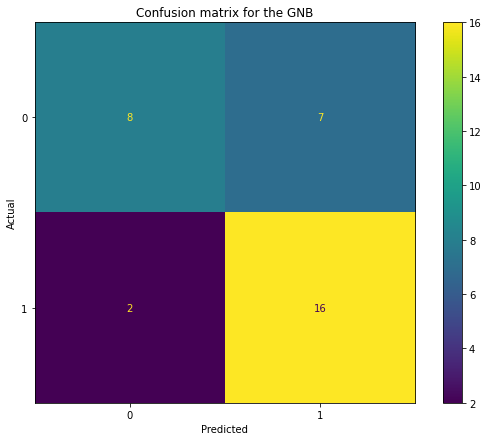

----------------------------------------------------------------------------------


In [ ]:
print("--------------------------------------------------------------------------")

from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(train,train_labels)

gnb_pred = gnb.predict(test)

print('\033[1m'+"Gaussian Naive Bayes"+'\033[0m'+"\n\n")
print(classification_report(test_labels,gnb_pred),"\n\n")
# Uncomment to print CR in a fancy way
# plot_classification_report(test_labels,gnb_pred)

f1_micro['GNB']=f1_score(test_labels,gnb_pred,average='micro')
f1_macro['GNB']=f1_score(test_labels,gnb_pred,average='macro')

print("F1 micro")
print(f1_micro['GNB'],"\n")
print("F1 macro")
print(f1_macro['GNB'],"\n")

plot_confusion_matrix(gnb, test, test_labels)  
plt.title('Confusion matrix for the GNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  
print("----------------------------------------------------------------------------------")

### k-Nearest Neighbors Classifier (kNN)

--------------------------------------------------------------------------
k Nearest Neighbors Model


              precision    recall  f1-score   support

           0       0.67      0.40      0.50        15
           1       0.62      0.83      0.71        18

    accuracy                           0.64        33
   macro avg       0.65      0.62      0.61        33
weighted avg       0.64      0.64      0.62        33

F1 micro
0.6363636363636364 

F1 macro
0.6071428571428572 



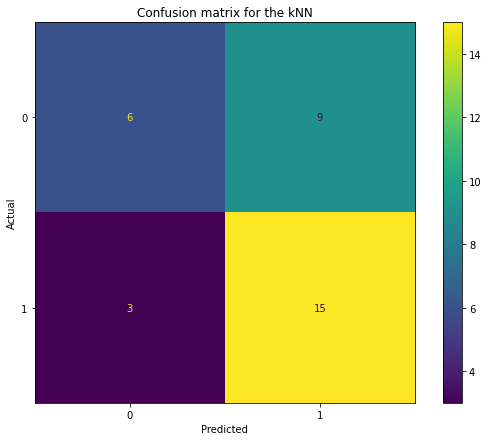

--------------------------------------------------------------------------


In [ ]:
print("--------------------------------------------------------------------------")
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier() 
clf.fit(train, train_labels)

knn_pred = clf.predict(test)


print('\033[1m'+"k Nearest Neighbors Model"+'\033[0m'+"\n\n")
print(classification_report(test_labels,knn_pred))

f1_micro['kΝΝ']=f1_score(test_labels,knn_pred,average='micro')
f1_macro['kΝΝ']=f1_score(test_labels,knn_pred,average='macro')


print("F1 micro")
print(f1_micro['kΝΝ'],"\n")
print("F1 macro")
print(f1_macro['kΝΝ'],"\n")

plot_confusion_matrix(clf, test, test_labels)  
plt.title('Confusion matrix for the kNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  
print("--------------------------------------------------------------------------")                           

### Γραφικές παραστάσεις

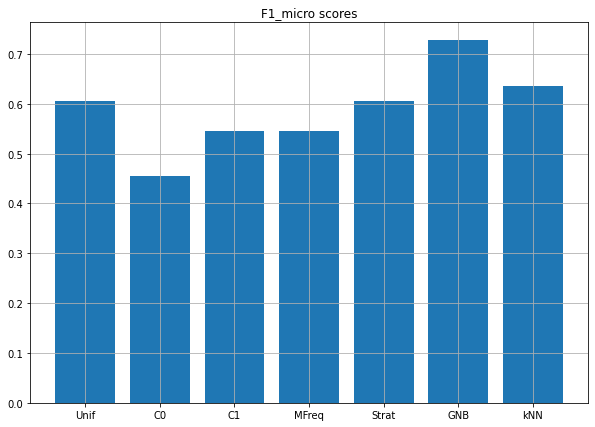

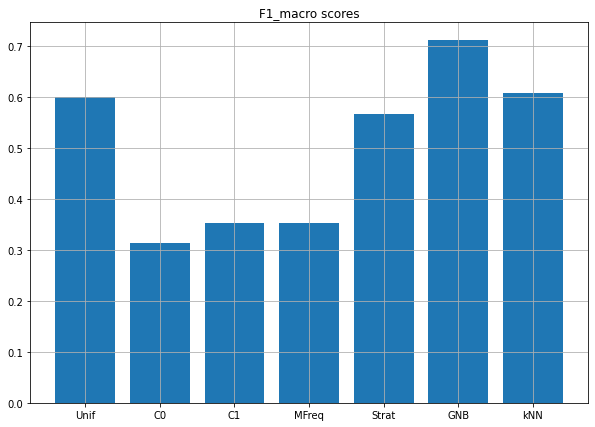

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)


plt.title('F1_micro scores')
plt.bar(range(len(f1_micro)), list(f1_micro.values()), align='center')
plt.xticks(range(len(f1_micro)), list(f1_micro.keys()))
plt.grid(True)

plt.show()

plt.title('F1_macro scores')
plt.bar(range(len(f1_macro)), list(f1_macro.values()), align='center')
plt.xticks(range(len(f1_macro)), list(f1_macro.keys()))
plt.grid(True)

plt.show()



### Σχολιασμός Αποτελεσμάτων
Παρατηρούμε πως οι Dummy classifiers  με constant τιμές έχουν πάρα πολύ χαμηλή αποτελεσματικότητα,πράγμα που περιμέναμε μιας και κάνουμε multiclass classification.Στην καλύτερη περίπτωση φτάνουν σε αποτελεσματικότητα ίση με αυτή της συχνότερα εμφανιζόμενης κλάσης
<br/>

Ο ταξινομητής με την υψηλότερα ακρίβεια είναι ο GNB ταξινομητής και ύστερα ο kNN .<br/>

Σε αυτήν την άσκηση δε δίνουμε σημασία στο precision και στο recall,καθώς θεωρούμε πως και οι 2 κλάσεις είναι εξίσου σημαντικές.</br>

Οι constant classifiers είχαν καλύτερη απόδοση στο f1-micro score,συγκριτικά με το f1-macro.Αυτό συμβαίνει διότι το macro score συνυπολογίζei κάθε κλάση ισάξια,ενώ στο micro score κάθε κλάση συνεισφέρει στο αποτέλεσμα σύμφωνα με το ποσοστό εμφάνισής της κάθε κλάσης.

O GNB δίνει τα καλύτερα αποτελέσματα καθώς το κάθε χαρακτηριστικό είναι ανεξάρτητο (εάν υπάρχει εξάρτηση μεταξύ κάποιων κλάσεων δεν είναι προφανής και ίσως δεν μπορούμε καν να το γνωρίζουμε).Επιπλέον,έχουμε μεγάλο αριθμό χαρακτηριστικών,πράγμα που δυσκολεύει τον kNN.

Τα αποτελέσματά μας,μας δείχνουν πως το συγκεκριμένο dataset είναι σχετικά δύσκολο στην ταξινόμηση.Λόγω του ελάχιστου αριθμού δειγμάτων που έχουμε στη διάθεση μας ένα μεγάλο νευρωνικό δίκτυο είναι πιθανό να παρουσιάσει φαινόμενα οverfitting και να παρέχει μειωμένη αποτελεσματικότητα σε καινούργια δεδομένα.Γι αυτό το λόγο δε θα ήταν έξυπνη η χρήση του χωρίς να έχει προηγηθέι επαύξηση δεδομένων.



Προσπαθώντας να επιτύχουμε καλύτερα αποτελέσματα στα μοντέλα που ήδη χρησιμοποιήσαμε προχωρούμε σε προεπεξεργασία των δεδομένων αλλά και βελτιστοποίηση των παραμέτρων των ταξινομητών.



## Γ. Βελτιστοποίηση ταξινομητών

### Προεπεξεργασία δεδομένων

Απουσιάζουσες τιμές χαρακτηριστικών $\to$ Δεν έχουμε πλέον απουσιάζουσες τιμές χαρακτηριστικών, άρα δεν υπάρχει κάποια βελτιστοποίηση να πραγματοποιηθεί στο συγκεκριμένο κομμάτι. <br/>

Αριθμητικά και κατηγορικά χαρακτηριστικά $\to$ Όλα μας τα χαρακτηριστικά είναι αριθμητικά, κι έτσι δεν υπάρχει κάποια τροποποίηση που πρέπει να γίνει στα δεδομένα μας.

Εξισορρόπηση του dataset $\to$ είναι απαραίτητο εφαρμόσουμε oversampling ούτως ώστε να εξισορροπήσουμε το dataset. Η έννοια του oversampling ειναι πρακτικά η επανάληψη samples από τις υπολείπουσες κλάσεις, ώστε ο λόγος τους να τείνει προς το ιδανικό 1/Ν%,όπου Ν ο αριθμός των κλάσεων.

Eπιλογή χαρακτηριστικών $\to$  μπορούμε να μειώσουμε τα χαρακτηριστικά εισόδου απορρίπτοντας χαρακτηριστικά με πολύ μικρή διακύμανση.Για να το πετύχουμε αυτό ορίζουμε ένα κατώφλι,όπου γίνονται αποδεκτά χαρακτηριστικά όπου έχουν μεγαλύτερη διακύμανση από αυτό.

Η κατάρα της διαστατικότητας (Curse of dimensionality) $\to$ Mπορούμε να κάνουμε εξαγωγή νέων χαρακτηριστικών σε ένα χώρο μικρότερων διαστάσεων. Η βασικότερη τεχνική feature extraction είναι η ανάλυση σε κύριες συνιστώσες (PCA) όπου αναλύουμε τα δεδομένα σε κύριες συνιστώσες και δουλέυουμε με τελείως νέες, γραμμικά ασυσχέτιστες μεταβλητές μικρότερης διαστατικότητας.Η τεχνική PCA χρησιμοποιείται ως αντικατάσταση στο μέθοδο επιλογής χαρακτηριστικών με κατώφλι.

Κανονικοποιηση $\to$ Θα εφαρμόσουμε κανονικοποίηση στα δεδομένα μας 

Ξεκινάμε με τη μείωση των διαστάσεων εισόδου.

#### Επιλογή Χαρακτηριστικών -Selector


In [ ]:
from sklearn.feature_selection import VarianceThreshold

train_variance = train.var(axis=0)
print("Train variance: (sorted)\n",sorted(train_variance),"\n")
print("Max variance of a label:\n",np.max(train_variance),"\n")
print("Mean:\n",train_variance.mean(),"\n")

Train variance: (sorted)
 [0.007499234771962056, 0.014898989898989934, 0.03624608150470224, 0.04310344827586211, 0.055898793762871365, 0.08754208754208737, 0.08878558310376501, 0.09989002932551332, 0.11207494795281069, 0.14243626743626742, 0.14792967846402968, 0.15956020380799116, 0.1649642492339121, 0.16643356643356672, 0.1671258034894402, 0.17068764568764577, 0.1875, 0.19036903690369034, 0.19529309488325852, 0.19896204755244765, 0.207049306625578, 0.22051282051282098, 0.22290209790209836, 0.22670454545454602, 0.23236178579690103, 0.40645354521780314, 0.41660839160839175, 0.8704853835978841, 1.393939393939394, 3.0573426573426588, 4.160490093240093, 7.15326481910946, 18.445975941051145, 23.825848354231976, 70.555386946387, 157.92980205278593, 195.49173553719007, 439.8485019762846, 1509.3952002164503, 2133.9246335638995, 2759.126811594205, 3182.8653981677207, 5850.516083916087, 27092.431589370633, 64107.77599067595, 114798.2127361854, 7485851.867760766, 10335534995.490507, 26129475722.1

Παρατηρούμε πως η τιμή της διακύμανσης των χαρακτηριστικών  παρουσιάζει μεγάλες διαφορές,
καθώς ξεκινάει από 0.0075 και αυξάνεται εκθετικά μέχρι την τιμή 26.166.976.836
Θα πειραματιστούμε παρακάτω με σχετικές τιμές στη μέθοδο GridSearchCV

#### Εξισορρόπηση του dataset

Έχουμε δύο βασικούς τρόπους για να εξισσοροπούμε ένα dataset, την υποδειγματοληψία (undersampling) και την υπερδειγματοληψία (oversampling). Εν ολίγοις, στο undersampling απλά αφαιρούμε δείγματα από όλες τις κατηγορίες που έχουν μεγαλύτερο πλήθος από τη μικρότερη, ενώ στο oversampling επιλέγουμε ορισμένα παραδείγματα ή όμοια με αυτά από τις λιγότερο συχνές κατηγορίες και τα επαναλαμβάνουμε. Στην πρώτη δηλαδή αφαιρούμε δεδομένα ενώ στην άλλη προσθέτουμε.

Γενικά το oversampling ενδείκνυται περισσότερο στην περίπτωσή μας, καθώς ο αριθμός των δειγμάτων είναι μικρός.

Έχουμε ήδη εγκαταστήσει (στο 1ο κελί του notebook) τη βιβλιοθήκη imbalanced-learn (ή imblearn),η οποία προσφέρει μεθόδους εξισορρόπησης datasets. 

Οι πιο συνηθισμένες μέθοδοι είναι το Random oversampling και το SMOTE oversampling.Στο Random oversampling, δείγματα της μειοψηφίας με τυχαίο τρόπο επιλέγονται και γίνονται duplicates έως ότου, η ισορροπία του dataset φθάσει στα επιθυμητά επιπέδα ισορροπίας. Η μέθοδος αυτή έχει το κακό ότι δημιουργεί ήδη υπάρχοντα δείγματα, με αποτέλεσμα να αυξάνεται ο κίνδυνος του overfitting.Το SMOTE oversampling προσθέτει samples, αλλά όχι ήδη υπάρχοντα. Χρησιμοποιεί για κάθε δείγμα της μειοψηφίας τον kΝΝ και βρίσκει τα k πιο κοντινά του δείγματα. Αναλόγως το sampling_strategy που έχουμε θέσει, για κάθε δείγμα της μειοψηφίας, επιλέγει μερικά από αυτά τα k κοντινά δείγματα για να δημιουργήσει νέα, επιλέγοντας για καθένα ένα τυχαίο σημείο πάνω στην ευθεία που το συνδέει με αυτό που του ασκήθηκε ο kNN.
Επιλέγουμε τη μέθοδο SMOTE oversampling, καθώς σε δοκιμές που επενεργήσαμε καταλήγει,κατά γενική ομολογία, σε καλύτερο αποτελέσμα.

In [ ]:
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler

In [ ]:
unique, counts = np.unique(train_labels, return_counts=True)
print("Before oversampling:",dict(zip(unique, counts)))


smote = SMOTE()
train_sampled, train_labels_sampled = smote.fit_sample(train,train_labels)

# Eπιβεβαιώνουμε ότι το training set έχει εξισορροπηθεί με oversampling
unique_after, counts_after = np.unique(train_labels_sampled, return_counts=True)
print("After oversampling:",dict(zip(unique_after, counts_after)))

Before oversampling: {0: 48, 1: 84}
After oversampling: {0: 84, 1: 84}


#### Kανονικοποίηση χαρακτηριστικών.

Χαρακτηριστικά με πολύ μεγάλες διαφορές στις τιμές τους μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση.Η κανονικοποίηση μετασχηματίζει τις τιμές των χαρακτηριστικών ώστε να αμβλυνθούν αυτές οι διαφορές και μπορεί να γίνει με 2 τρόπους: Διαιρώντας με τη διαφορά μεγίστου-ελαχίστου (feature scaling) οπότε οι τιμές όλων των χαρακτηριστικών κλιμακώνονται γραμμικά στο διάστημα [0,1] ή με το standard score του κάθε χαρακτηριστικού, που κάνει το χαρακτηριστικό να έχει μέση τιμή μηδέν και διακύμανση μονάδα. H μετατροπή σε standard score είναι απαραίτητη σε πολλούς ταξινομητές για να συμπεριφερθούν σωστά. Επίσης είναι πιο ανθεκτική από την min-max σε σποραδικές τιμές που είναι πολύ μακριά απο τη μέση τιμή και τις υπόλοιπες τιμές του χαρακτηριστικού. Από την άλλη, η κλιμάκωση στο [0,1] είναι λιγότερο ευαίσθητη σε μικρές αποκλίσεις και επίσης σε αραιά διανύσματα διατηρεί τις μηδενικές τιμές.

Πειραματιζόμενοι με τις 2 μεθόδους καταλήξαμε πως το standard score δίνει καλύτερα αποτελέσματα. 

In [ ]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

#X_train_scaled = preprocessing.scale(train_reduced) #Εναλλακτικός τρόπος να κανονικοποιήσουμε τα δεδομένα train 

scaler = preprocessing.StandardScaler().fit(train_sampled)
train_scaled = scaler.transform(train_sampled)
test_scaled = scaler.transform(test)

#Υπάρχει και η επιλογή του min max scaler εκτός του z-score που χρησιμοποιήθηκε παραπάνω
# το ίδιο με  min max scaling
#min_max_scaler = preprocessing.MinMaxScaler()
#train_minmax = min_max_scaler.fit_transform(train_reduced)
#test_minmax = min_max_scaler.transform(test_reduced)

In [ ]:
clf.fit(train_scaled, train_labels_sampled)

knn_pred_scaled = clf.predict(test_scaled)


print('\033[1m'+"kNN Before"+'\033[0m'+"\n\n")
print(classification_report(test_labels,knn_pred))

print('\033[1m'+"kNN After sampling and Normalization"+'\033[0m'+"\n\n")
print(classification_report(test_labels,knn_pred_scaled))

kNN Before


              precision    recall  f1-score   support

           0       0.67      0.40      0.50        15
           1       0.62      0.83      0.71        18

    accuracy                           0.64        33
   macro avg       0.65      0.62      0.61        33
weighted avg       0.64      0.64      0.62        33

kNN After sampling and Normalization


              precision    recall  f1-score   support

           0       0.64      0.60      0.62        15
           1       0.68      0.72      0.70        18

    accuracy                           0.67        33
   macro avg       0.66      0.66      0.66        33
weighted avg       0.67      0.67      0.67        33



Παρατηρούμε πως πριν καν εφαρμόσουμε GridSearchCV για εύρεση των βέλτιστων υπερ-παραμέτρων του k,του αριθμού μείωσης των χαρακτηριστικών και της μείωσης της διαστατικότητας έχουμε ήδη πετύχει καταφέρει να βελτιώσουμε την απόδοση του ταξινομητή kNN.

#### Μείωση της διαστατικότητας με εξαγωγή χαρακτηριστικών 


Θα εφαρμόσυμε την τεχνική Principal Components Analysis (PCA) για μείωση των διαστάσεων των δεδομένων μας.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n = 25
pca = PCA(n_components=n)

trainPCA = pca.fit_transform(train_scaled)
testPCA = pca.transform(test_scaled)

print(trainPCA.shape)

(160, 25)


[0.1001925  0.17667449 0.24353621 0.2996459  0.35387757 0.39841789
 0.44012219 0.4781174  0.51211197 0.54298176 0.57293776 0.60077553
 0.62692381 0.6527907  0.67663546 0.69892129 0.71967044 0.73996666
 0.75960452 0.77836162 0.79599561 0.81165494 0.82677083 0.84153848
 0.854968  ]


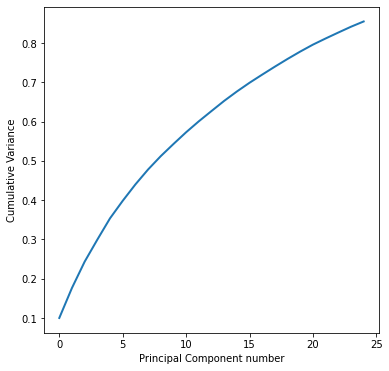

In [ ]:
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(6, 6))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

Από το γράφημα παρατηρούμε πως με μόλις 25 συνιστώσες περιγράφουμε σχεδόν το 100% της διακύμανσης του dataset και με μόλις 17 περιγράφουμε και πάλι ένα πολύ μεγάλο ποσοστό (~70%). Μπορούμε λοιπόν να μειώσουμε το n και στην τιμή 17 χωρίς να χάσουμε σημαντική πληροφορία. 

**Σημέιωση**</br>
Ο αριθμός των χαρακτηριστικών που θα κρατήσουμε τελικά αποτελεί μια υπερπαράμετρο.Παρακάτω θα αναζητήσουμε τη βέλτιστη τιμή της χρησιμοποιώντας 10-fold cross validation και GridSearch.

### **Hyperparameter tuning**

Για το κούρδισμα υπερπαραμέτρων θα εφαρμόσουμε 10-fold cross validation με τη μέθοδο gridsearchCV που κάνει μαζί και GridSearch μαζί.Στη συνέχεια πειραματιζόμαστε με την αρχιτεκτονική του pipeline και τέλος συγκρίνουμε τα καλύτερα αποτελέσματα με αυτά που είχαμε πριν τη βελτιστοποίηση.

#### **GrindSearchCV για τον kNN** 

In [ ]:
import time
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
# Αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
sm = SMOTE()
pca = PCA()
clf = neighbors.KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', sm), 
                       ('pca', pca), ('kNN', clf)])


##### **1o Search**

In [ ]:
vthreshold = [ 0.1, 0.2, 1, 5, 20, 500, 10000 ] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [7, 15, 20, 25]
k = [1, 3, 5, 7, 9, 11] # η υπερπαράμετρος του ταξινομητή

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, 
                                    pca__n_components=n_components, 
                                    kNN__n_neighbors=k), 
                                    cv=10, 
                                    scoring='f1_macro', 
                                    n_jobs=-1,
                                    verbose=1
                                )

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(test_labels, preds))

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:   35.0s


Συνολικός χρόνος fit και predict: 57.63417983055115 seconds
              precision    recall  f1-score   support

           0       0.50      0.73      0.59        11
           1       0.82      0.64      0.72        22

    accuracy                           0.67        33
   macro avg       0.66      0.68      0.66        33
weighted avg       0.72      0.67      0.68        33



[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:   57.5s finished


Εκτυπώνουμε τον καλύτερο συνδυασμό από αυτούς που δοκιμάσαμε

In [ ]:
# Best combination
print(estimator.best_estimator_)
print(estimator.best_params_)

Pipeline(steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler', StandardScaler()), ('sampler', SMOTE()),
                ('pca', PCA(n_components=15)),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=1))])
{'kNN__n_neighbors': 1, 'pca__n_components': 15, 'selector__threshold': 1}


##### **2o Search (Progressive**)

In [ ]:
vthreshold = [ 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4 ] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [13, 14, 15, 16, 17]
k = [1, 2, 3] # η υπερπαράμετρος του ταξινομητή

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(test_labels, preds))

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   47.3s


Συνολικός χρόνος fit και predict: 62.11964559555054 seconds
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.88      0.68      0.77        22

    accuracy                           0.73        33
   macro avg       0.72      0.75      0.72        33
weighted avg       0.78      0.73      0.74        33



[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:  1.0min finished


In [ ]:
# Best combination
print(estimator.best_estimator_)
print(estimator.best_params_)

Pipeline(steps=[('selector', VarianceThreshold(threshold=1.1)),
                ('scaler', StandardScaler()), ('sampler', SMOTE()),
                ('pca', PCA(n_components=14)),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=1))])
{'kNN__n_neighbors': 1, 'pca__n_components': 14, 'selector__threshold': 1.1}


### Αποτελέσματα

Καναμε μερικές δοκιμές χωρίς τη χρήση των διάφορων μέσων προεπεξεργασίας δεδομένων χρησιμοποιώντας στα αντίστοιχα πεδία τις βέλτιστες τιμές που προέκυψαν από το cross validation. Από τις τιμές των f1 όπου προέκυψαν καταλήγουμε στα εξής συμπεράσματα: Η χρήση selector βελτιώνει τα αποτελέματα όπως αναφέρθηκε και νωρίτερα, όμοια και η χρήση PCA, μιας και με 14 συνιστώσες κρατάμε πιθανότατα όλο το ποσοστό πληροφορίας που απαιτείται για να έχουμε βέλτιστα αποτελέσματα. Σημαντική διαφορά παρατηρείται με τη χρήση και με scaler, ενώ και η χρήση του oversampling δίνει καλύτερο αποτέλεσμα της μετρικής f1 macro και ίδιο αποτέλεσμα στη μετρική f1 micro. 

Τα νούμερα από το τελικό μοντέλο kNN κρίνονται ικανοποιητικά,καθώς σε [σχετική δημοσίευση](https://www.sciencedirect.com/science/article/pii/S1532046415002063)[1] που χρησιμοποιήθηκε το ίδιο dataset η αποτελεσματικότητα ενός απλού MLP και της γραμμικής παλινδρόμησης που χρησιμοποίησαν οι ερευνητές είναι συγκρίσιμα με αυτά που πετύχαμε εμείς.

Μετά την προεπεξεργασία και τη βελτιστοποίηση παραμέτρων παρατηρούμε σημαντική βελτίωση των f1 micro και f1 macro μετρικών του ταξινομητή kNN. Αντίστοιχα για τους dummy ταξινομητές constant δεν υπάρχει καμία αλλαγή στις f1 μετρικές τους ενώ έχουμε μικρή βελτίωση για τον uniform και πολύ χειρότερες τιμές για τους most frequent το οποίο πιθανότατα οφείλεται στην εξισορρόπηση των δεδομένων.

Σχετικά με τους χρόνους εκπαίδευσης και πρόβλεψης παρατηρούμε το εξής "παράδοξο": ο χρόνος εκπαίδευσης του kNN ταξινομητή σε ορισμένα τρεξίματα μεγαλώνει με τα τελικά δεδομένα παρά τη σημαντική μείωση της διαστατικότητας, ενώ πολλοί θα περίμεναν λόγω του μικρότερου πλήθους χαρακτηριστικών να έχουμε και πολύ μικρότερο χρόνο εκπαίδευσης. Αυτό όμως πιθανόν να οφείλεται στο γεγονός ότι αν και μειώθηκαν σημαντικά τα χαρακτηριστικά, αυξήθηκαν τα δείγματα μέσω της εξισορρόπησης του δείγματος με αποτέλεσμα τον μεγαλύτερο χρόνο εκπαίδευσης. Σε γενικότερο πλαίσιο όμως οι χρόνο τόσο εκπαίδευσης (train) όσο και πρόβλεψης (test) δεν είχαν σημαντικές διαφορές.

[1] [Miriam Seoane Santos, Pedro Henriques Abreu, Pedro J Garcia-Laencina, Adelia Simao, Armando Carvalho, A new cluster-based oversampling method for improving survival prediction of hepatocellular carcinoma patients, Journal of biomedical informatics, 58, 49-59, 2015.](https://www.sciencedirect.com/science/article/pii/S1532046415002063)

# Μεγάλο Dataset (B08)

## Α. Βασικές πληροφορίες


![UCI ML Logo](http://archive.ics.uci.edu/ml/assets/logo.gif "UCI Machine Learning Repository")
<h3>1. Συνοπτική παρουσίαση του dataset</h3>

Το dataset περιέχει 1080 έγγραφα ελεύθερου κειμένου που αφορούν περιγραφές βραζιλιάνικων εταιρειών κατηγοριοποιημένων σε 9 κατηγορίες.Κάθε κατηγορία καταγράφεται σε έναν πίνακα που ονομάζεται Εθνική Ταξινόμηση των Οικονομικών Δραστηριοτήτων (Classificação Nacional de
Atividade Econômicas - CNAE). Τα αρχικά κείμενα υποβλήθηκαν σε προεπεξεργασία για τη δημιουργία του dataset: αρχικά, κρατήθηκαν μόνο τα 
γράμματα και στη συνέχεια αφαιρέθηκαν οι προθέσεις των κειμένων. Στη συνέχεια, οι λέξεις μετατράπηκαν στην κανονική τους μορφή. Τελικά,
κάθε έγγραφο παρουσιάστηκε ως διάνυσμα, όπου τα χακτηριστικά του είναι λέξεις.Το βάρος κάθε λέξης είναι η συχνότητά του στο έγγραφο. Αυτό το σύνολο δεδομένων είναι
πολύ αραιό (το 99,22% των χαρακτηριστικών είναι μηδενικά).<br/>


<h3>2. Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;</h3>

<STRONG><h5>Αριθμός δειγμάτων:</h5>   1080<br/>
<h5>Αριθμός χαρακτηριστικών:</h5> &nbsp 856 <br/>
<h5>Είδος χαρακτηριστικών:</h5></STRONG>  

Πραγματικές αριθμητικές τιμές. Τα χαρακτηριστικά συμβολίζουν λέξεις και οι εγγραφές ένα κείμενο.Το βάρος κάθε χαρακτηριστικού αφορά τη συχνότητα εμφάνισής της λέξης στο έγγραφο.
<br/> 
<br/> 
  


In [ ]:
# Αρχικά πρέπει να γίνει upload αρχείο "dermatology.data",το οποίο είναι το S05 dataset
df = pd.read_csv("CNAE-9.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print (df.shape)
print("To dataset έχει ",df.shape[0],"δείγματα και ",df.shape[1]-1,"χαρακτηριστικά")

(1080, 857)
To dataset έχει  1080 δείγματα και  856 χαρακτηριστικά



<h3>3. Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;</h3>

Δεν υπάρχουν επικεφαλίδες,ούτε αρίθμηση γραμμών.

<h3>4. Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολώνα βρίσκονται; </h3>
Οι κλάσεις μας βρίσκονται στην πρώτη στήλη και πρόκειται για αριθμητικές τιμές (εύρος τιμών 0-9)



<h3>5. Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες? </h3>

Το Dataset μας δώθηκε σε ένα αρχείο και όλες οι μεταβλητές είναι αριθμητικές,συνεπώς δε πραγματοποιήσαμε κάποια αλλαγή. 



<h3>6. Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου; </h3>

Δεν υπάρχουν απουσιάζουσες τιμές.



<h3>7. Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.</h3>
</br>

In [ ]:
# Τα χαρακτηριστικά αποτελούνται από όλες τις κολόνες των δεδομένων εκτός της 1ης 
# η οποία αποτελεί τις ετικέτες κάθε δείγματος. 
features_df = df.iloc[:, 1:857]
# Μετατρέπουμε τα dataframes σε numpy array
features = features_df.values
# Ελέγχουμε αν τα χαρακτηριστικά έχουν τη μορφή που θέλουμε
print ("features shape:\n",features.shape,"\n")
print("features:\n",features)
# Ελέγχουμε το ποσοστό μηδενικών features
cnt = 0
for x in features:
  for y in x:
    if (y==0):
      cnt+=1
print("\nTo ποσοστό μηδενικών features(%) είναι:\n")
print(100*cnt/(1080*856))

features shape:
 (1080, 856) 

features:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

To ποσοστό μηδενικών features(%) είναι:

99.21761422637591


In [ ]:
#----------------------------------------------------------------#
#            Ποσοστά εμφάνισης κάθε κλάσης                       #
#----------------------------------------------------------------#
# Oι ταμπέλες βρίσκονται στη 1η στήλη 
target_df = df.iloc[:, [0]]

# μετατρέπουμε το dataframe σε μονοδιάστατο numpy array
target = target_df.values

# Δημιουργούμε και εκτυπωνουμε ενα 2-D array με την 1η στήλη την κλάση και 2η στήλη την συχνότητα εμφάνισης
label, frequencies = np.unique(target, return_counts=True)
print ("frequencies:\n",np.asarray((label, frequencies)).T,"\n")
# Αριθμός όλων των δειγμάτων
total_samples = target.shape[0]
print("total samples=",total_samples,"\n")

# Εκτυπώνουμε ένα 2D array με 1η στήλη το όνομα της κλάσης και 2η στήλη το ποσοστό εμφάνισης της κάθε κλάσης
percentage = (frequencies / total_samples) * 100
print ("percentages\n",np.asarray((label, percentage)).T)

frequencies:
 [[  1 120]
 [  2 120]
 [  3 120]
 [  4 120]
 [  5 120]
 [  6 120]
 [  7 120]
 [  8 120]
 [  9 120]] 

total samples= 1080 

percentages
 [[ 1.         11.11111111]
 [ 2.         11.11111111]
 [ 3.         11.11111111]
 [ 4.         11.11111111]
 [ 5.         11.11111111]
 [ 6.         11.11111111]
 [ 7.         11.11111111]
 [ 8.         11.11111111]
 [ 9.         11.11111111]]


Παρατηρούμε πως το dataset είναι ισορροπημένο


<h3>8. Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.</h3>



<h3>Χωρίζουμε σε train,test data</h3>

In [ ]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, target, test_size=0.3)

##Β. Βaseline Classification

Στο σημείο αυτό κάνουμε απλή εκπαίδευση στους γνωστούς μας classifiers, dummy, gaussian naive bayes, knn και mlp.

Για κάθε classifier αποθηκεύουμε σε πίνακα τις τιμές f1_micro και f1_macro, ώστε να τα απεικονίσουμε σε bar plot, και τυπώνουμε confusion matrix, f1_micro, f1_macro αλλά και classification report για να πάρουμε τις τιμές precision και recall.

Kαθώς το dataset μας είναι ισορροπημένο δεν κρίνεται απαραίτητο να υλοποιήοουμε ενα Dummy classifier για κάθε κλάση,αλλά θα υλοποιήσουμε έναν για την 1η κλάση.Τα αποτελέσματα θα είναι προφανώς τα ίδια και για όλες τις υπόλοιπες.

Aκολουθεί μια συνάρτηση η οποία θα μας βοηθήσει να εκτυπώσουμε με όμορφο τρόπο τα αποτελέσματα από τα μοντέλα μας.Το κομμάτι κώδικα προέρχεται [από το stack overflow](https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report)

In [ ]:
#---------------------------------------------------------------------------------------------------------#
# Κώδικας για την όμορφη εκτύπωση classification reports.                                                 #
# Reference: https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report  #
#---------------------------------------------------------------------------------------------------------#

import seaborn as sns

def plot_classification_report(y_tru, y_prd, figsize=(5, 5), ax=None):

    plt.figure(figsize=figsize)
    plt.title("Classification Report")
    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

### Dummy Classifiers

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<------------------------------------------------------------------------------------->
 Strategy: uniform

F1 micro 
0.14506172839506173 

F1 macro 
0.14394559468893267 



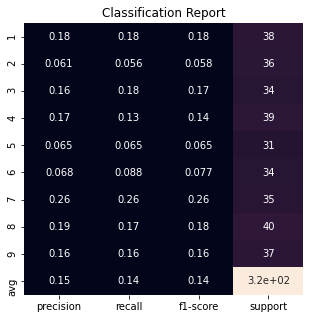

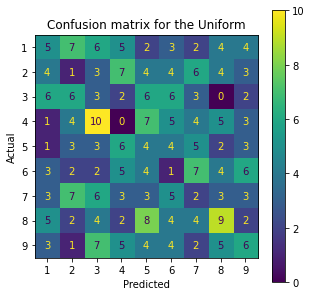



----------------------------------------------------------


Strategy: constant=1
F1 micro 
0.11728395061728394 

F1 macro 
0.023327194597912826 



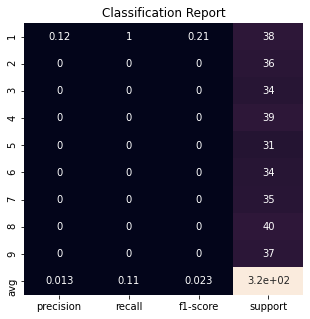

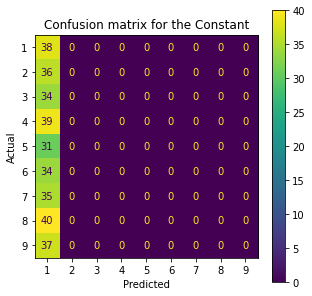



----------------------------------------------------------


Strategy: Most Frequent

F1 micro 
0.09567901234567901 

F1 macro 
0.019405320813771516 



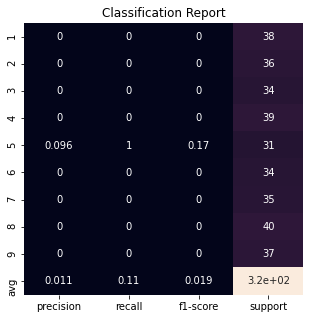

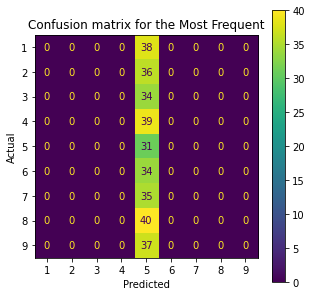



----------------------------------------------------------


Strategy: stratified

F1 micro 
0.12345679012345678 

F1 macro 
0.12159899023068364 



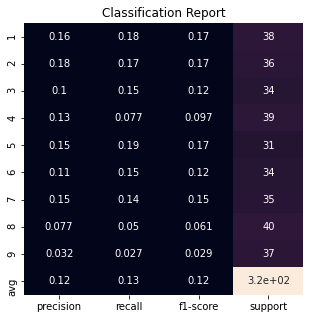

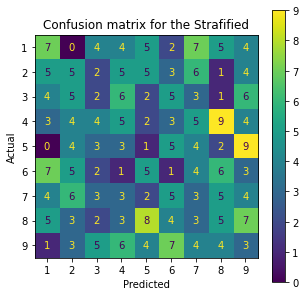

<------------------------------------------------------------------------------------->


In [ ]:
from sklearn.dummy   import DummyClassifier

print("<------------------------------------------------------------------------------------->")

# Απενεργοποιούμε τις προειδοποιήσεις που δεχόμαστε όταν προσπαθούμε
# να υπολογίσουμε f1-score για με τιμές που είναι μηδέν 
# (διαίρεση με 0).
import warnings
warnings.filterwarnings("ignore")

#πίνακες που θα χρησιμέυσουν για την εκτύπωση των γραφημάτων
f1_micro = {}
f1_macro = {}


##############################################################
# Για κάθε Dummy classifier αρχικά κάνουμε fit,στη συνέχεια #
# υπολογίζουμε τα F1 micro,F1 macro scores,καθώς και τους    #
# Confusion Matrixes.Στη συνέχεια εκτυπώνουμε στην οθόνη τα  #
# αποτελέσματα.Την ίδια μεθολογία θα ακολουθήσουμε και στα   #
# υπόλοιπα μοντέλα της άσκησης (knn,GNB,MLP)                 #
##############################################################

# Dummy Strategy: Uniform 
dc_uniform = DummyClassifier(strategy="uniform")
dc_uniform.fit(train,train_labels)

preds = dc_uniform.predict(test)

print('\033[1m'+" Strategy: uniform"+'\033[0m'+"\n")
plot_classification_report(test_labels,preds)

f1_micro['Unif']=f1_score(test_labels,preds,average='micro')
f1_macro['Unif']=f1_score(test_labels,preds,average='macro')

print("F1 micro ")
print(f1_micro['Unif'],"\n")
print("F1 macro ")
print(f1_macro['Unif'],"\n")

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dc_uniform, test, test_labels,ax=ax)  
plt.title('Confusion matrix for the Uniform')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  


print("\n\n----------------------------------------------------------\n\n")


# Strategy: Constant=1
dc_constant1 = DummyClassifier(strategy="constant",constant=1)
dc_constant1.fit(train,train_labels)

pred_C1 = dc_constant1.predict(test)

print('\033[1m'+"Strategy: constant=1"+'\033[0m')
plot_classification_report(test_labels,pred_C1)

f1_micro['C1']=f1_score(test_labels,pred_C1,average='micro')
f1_macro['C1']=f1_score(test_labels,pred_C1,average='macro')

print("F1 micro ")
print(f1_micro['C1'],"\n")
print("F1 macro ")
print(f1_macro['C1'],"\n")

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dc_constant1, test, test_labels,ax=ax)  
plt.title('Confusion matrix for the Constant')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

print("\n\n----------------------------------------------------------\n\n")


# Strategy: Most Frequent
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_most_frequent.fit(train,train_labels)

pred_MF = dc_most_frequent.predict(test)

print('\033[1m'+"Strategy: Most Frequent"+'\033[0m'+"\n")
plot_classification_report(test_labels,pred_MF)

f1_micro['MFreq']=f1_score(test_labels,pred_MF,average='micro')
f1_macro['MFreq']=f1_score(test_labels,pred_MF,average='macro')

print("F1 micro ")
print(f1_micro['MFreq'],"\n")
print("F1 macro ")
print(f1_macro['MFreq'],"\n")

fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(dc_most_frequent, test, test_labels, ax=ax)
plt.title('Confusion matrix for the Most Frequent')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  


print("\n\n----------------------------------------------------------\n\n")


# Strategy: Strafified
dc_stratified = DummyClassifier(strategy="stratified")
dc_stratified.fit(train,train_labels)

pred_Strat = dc_stratified.predict(test)

print('\033[1m'+"Strategy: stratified"+'\033[0m'+"\n")
plot_classification_report(test_labels,pred_Strat)


f1_micro['Strat']=f1_score(test_labels,pred_Strat,average='micro')
f1_macro['Strat']=f1_score(test_labels,pred_Strat,average='macro')

print("F1 micro ")
print(f1_micro['Strat'],"\n")
print("F1 macro ")
print(f1_macro['Strat'],"\n")

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dc_stratified, test, test_labels,ax=ax)
plt.title('Confusion matrix for the Strafified')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

print("<------------------------------------------------------------------------------------->")

### k-Nearest Neighbors Classifier (kNN)

--------------------------------------------------------------------------
k Nearest Neighbors Model


              precision    recall  f1-score   support

           1       0.87      1.00      0.93        34
           2       0.86      0.97      0.91        32
           3       0.91      0.89      0.90        45
           4       0.83      0.74      0.78        34
           5       0.97      0.92      0.94        37
           6       0.95      0.57      0.71        37
           7       0.69      0.93      0.79        27
           8       0.83      0.97      0.89        35
           9       0.73      0.70      0.71        43

    accuracy                           0.85       324
   macro avg       0.85      0.85      0.84       324
weighted avg       0.85      0.85      0.84       324

F1 micro
0.845679012345679 

F1 macro
0.8424866845508534 



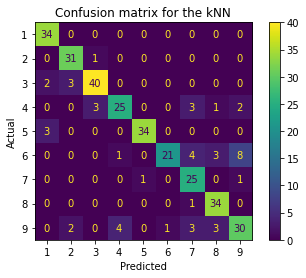

--------------------------------------------------------------------------


In [ ]:
print("--------------------------------------------------------------------------")
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier() 
clf.fit(train, train_labels)

knn_pred = clf.predict(test)


print('\033[1m'+"k Nearest Neighbors Model"+'\033[0m'+"\n\n")
print(classification_report(test_labels,knn_pred))

# Uncomment to print C.R. in a fancy way
# plot_classification_report(test_labels,knn_pred)

f1_micro['kΝΝ']=f1_score(test_labels,knn_pred,average='micro')
f1_macro['kΝΝ']=f1_score(test_labels,knn_pred,average='macro')


print("F1 micro")
print(f1_micro['kΝΝ'],"\n")
print("F1 macro")
print(f1_macro['kΝΝ'],"\n")

plot_confusion_matrix(clf, test, test_labels)  
plt.title('Confusion matrix for the kNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  
print("--------------------------------------------------------------------------")                           

### Gaussian Naive Bayes


--------------------------------------------------------------------------
Gaussian Naive Bayes


              precision    recall  f1-score   support

           1       0.97      1.00      0.99        34
           2       0.97      1.00      0.98        32
           3       0.81      0.96      0.88        45
           4       0.74      0.76      0.75        34
           5       1.00      0.95      0.97        37
           6       1.00      0.84      0.91        37
           7       0.96      1.00      0.98        27
           8       0.95      1.00      0.97        35
           9       0.95      0.81      0.88        43

    accuracy                           0.92       324
   macro avg       0.93      0.92      0.92       324
weighted avg       0.92      0.92      0.92       324
 


F1 micro
0.9197530864197531 

F1 macro
0.9238137968834594 



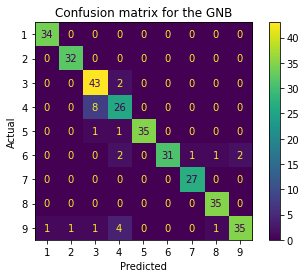

----------------------------------------------------------------------------------


In [ ]:
print("--------------------------------------------------------------------------")

from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(train,train_labels)

gnb_pred = gnb.predict(test)

print('\033[1m'+"Gaussian Naive Bayes"+'\033[0m'+"\n\n")
print(classification_report(test_labels,gnb_pred),"\n\n")
# Uncomment to print CR in a fancy way
# plot_classification_report(test_labels,gnb_pred)

f1_micro['GNB']=f1_score(test_labels,gnb_pred,average='micro')
f1_macro['GNB']=f1_score(test_labels,gnb_pred,average='macro')

print("F1 micro")
print(f1_micro['GNB'],"\n")
print("F1 macro")
print(f1_macro['GNB'],"\n")

plot_confusion_matrix(gnb, test, test_labels)  
plt.title('Confusion matrix for the GNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  
print("----------------------------------------------------------------------------------")

### Support Vector Machines (SVM)

--------------------------------------------------------------------------
SVM


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       0.87      0.97      0.92        34
           3       0.97      0.86      0.91        43
           4       0.94      0.77      0.85        44
           5       0.97      1.00      0.99        36
           6       0.84      0.87      0.86        31
           7       1.00      0.86      0.93        36
           8       1.00      0.97      0.98        32
           9       0.67      0.92      0.78        36

    accuracy                           0.91       324
   macro avg       0.92      0.91      0.91       324
weighted avg       0.92      0.91      0.91       324
 


F1 micro
0.9074074074074074 

F1 macro 
0.9121846496974173 



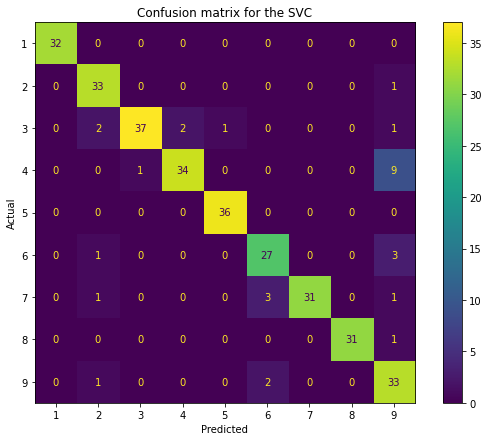

--------------------------------------------------------------------------


In [ ]:
from sklearn.svm import SVC

print("--------------------------------------------------------------------------")

svc = SVC()

svc.fit(train,train_labels)
svc_pred = svc.predict(test)

print('\033[1m'+"SVM"+'\033[0m'+"\n\n")
print(classification_report(test_labels,svc_pred),"\n\n")

f1_micro['SVC']=f1_score(test_labels,svc_pred,average='micro')
f1_macro['SVC']=f1_score(test_labels,svc_pred,average='macro')

print("F1 micro")
print(f1_micro['SVC'],"\n")
print("F1 macro ")
print(f1_macro['SVC'],"\n")

plot_confusion_matrix(svc, test, test_labels)  
plt.title('Confusion matrix for the SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  
print("--------------------------------------------------------------------------")

### Multilayer Perceptron (MLP)

--------------------------------------------------------------------------
Multilayer Perceptron


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.97      1.00      0.98        32
           3       0.96      0.98      0.97        45
           4       0.79      0.91      0.85        34
           5       1.00      1.00      1.00        37
           6       0.97      0.86      0.91        37
           7       0.93      0.96      0.95        27
           8       0.97      1.00      0.99        35
           9       0.95      0.84      0.89        43

    accuracy                           0.95       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.95      0.95      0.95       324
 


F1 micro
0.9475308641975309 

F1 macro 
0.9483897846364885 



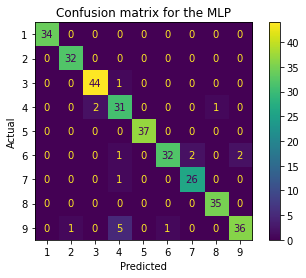

--------------------------------------------------------------------------


In [ ]:
print("--------------------------------------------------------------------------")

# ######################################################################### #
# Θα χρησιμοποιήσουμε τον MLP ταξινομητή χωρίς να ορίσουμε τιμές,πράγμα που # 
# σημαίνει πως θα χρησιμοποηθούν οι default ρυθμίσεις υπερπαραμέτρων        #
# ######################################################################### #

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

clf.fit(train,train_labels)
mlp_pred = clf.predict(test)

print('\033[1m'+"Multilayer Perceptron"+'\033[0m'+"\n\n")
print(classification_report(test_labels,mlp_pred),"\n\n")

f1_micro['MLP']=f1_score(test_labels,mlp_pred,average='micro')
f1_macro['MLP']=f1_score(test_labels,mlp_pred,average='macro')

print("F1 micro")
print(f1_micro['MLP'],"\n")
print("F1 macro ")
print(f1_macro['MLP'],"\n")

plot_confusion_matrix(clf, test, test_labels)  
plt.title('Confusion matrix for the MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  
print("--------------------------------------------------------------------------")



### Γραφικές παραστάσεις

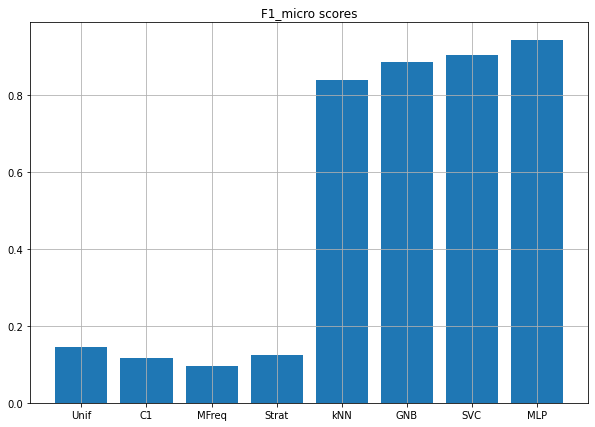

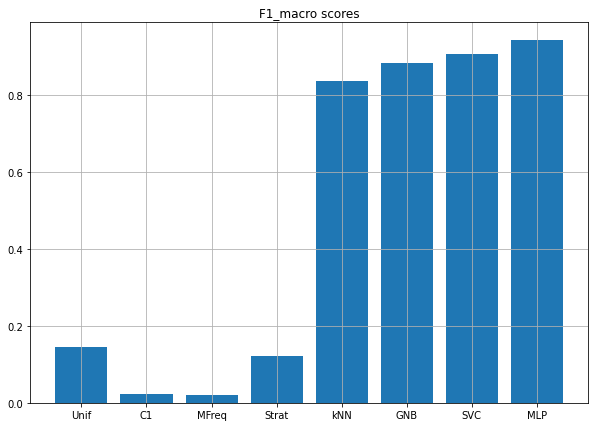

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)


plt.title('F1_micro scores')
plt.bar(range(len(f1_micro)), list(f1_micro.values()), align='center')
plt.xticks(range(len(f1_micro)), list(f1_micro.keys()))
plt.grid(True)

plt.show()

plt.title('F1_macro scores')
plt.bar(range(len(f1_macro)), list(f1_macro.values()), align='center')
plt.xticks(range(len(f1_macro)), list(f1_macro.keys()))
plt.grid(True)

plt.show()


### Σχολιασμός Αποτελεσμάτων
Παρατηρούμε πως οι Dummy classifiers  με constant τιμές έχουν πάρα πολύ χαμηλή αποτελεσματικότητα,πράγμα που περιμέναμε μιας και κάνουμε multiclass classification.Στην καλύτερη περίπτωση φτάνουν σε αποτελεσματικότητα ίση με αυτή της συχνότερα εμφανιζόμενης κλάσης.Eντύπωση κάνει πως σε αυτό το split η κλάση C1 εμφανίζεται συχνότερα από τις υπόλοιπες και έτσι ο most frequent ταξινομητής δίνει χειρότερα αποτελέσματα από τον constant=1 ταξινομητή.
<br/>

Ο ταξινομητής με την υψηλότερα ακρίβεια είναι ο MLP ταξινομητής,ύστερα ο SVC και ο GNB.Τέλος ακολουθεί ο kNN.<br/>

Σε αυτήν την άσκηση δε δίνουμε σημασία στο precision και στο recall,καθώς θεωρούμε πως όλες οι κλάσεις είναι το ίδιο σημαντικές.</br>

Οι constant classifiers είχαν καλύτερη απόδοση στο f1-micro score,συγκριτικά με το f1-macro.Αυτό συμβαίνει διότι το macro score συνυπολογίζei κάθε κλάση ισάξια,ενώ στο micro score κάθε κλάση συνεισφέρει στο αποτέλεσμα σύμφωνα με το ποσοστό εμφάνισής της κάθε κλάσης.

Λαμβάνοντας υπ'όψην πως δεν έχουμε προσπαθήσει ακόμα να βελτιστοποιήσουμε τα δεδομένα μας,λαμβάνουμε ικανοποιητικά πρώτα αποτελέσματα.Οι MLP,SVC και GNB ταξινομητές πετυχαίνουν πάνω από 90% ακρίβεια,ενώ ο kNN πάνω από 80%.Ο GNB συμπεριφέρεται αρκετά καλά,διότι δεν επηρεάζεται από το μεγάλο πλήθος των κλάσεων συγκριτικά με τα δεδομένα μας και οι κλάσεις είναι ανεξάρτητες μεταξύ τους.

Προσπαθώντας να επιτύχουμε καλύτερα αποτελέσματα προχωρούμε σε προεπεξεργασία των δεδομένων αλλά και βελτιστοποίηση των παραμέτρων των ταξινομητών.



## Γ. Βελτιστοποίηση ταξινομητών

### Προεπεξεργασία δεδομένων

Απουσιάζουσες τιμές χαρακτηριστικών $\to$ Δεν έχουμε πλέον απουσιάζουσες τιμές χαρακτηριστικών, άρα δεν υπάρχει κάποια βελτιστοποίηση να πραγματοποιηθεί στο συγκεκριμένο κομμάτι. <br/>

Αριθμητικά και κατηγορικά χαρακτηριστικά $\to$ Όλα μας τα χαρακτηριστικά είναι αριθμητικά, κι έτσι δεν υπάρχει κάποια τροποποίηση που πρέπει να γίνει στα δεδομένα μας.

Εξισορρόπηση του dataset $\to$ το dataset είναι ισορροπημένο.

Eπιλογή χαρακτηριστικών $\to$  μπορούμε να μειώσουμε τα χαρακτηριστικά εισόδου απορρίπτοντας χαρακτηριστικά με πολύ μικρή διακύμανση.Για να το πετύχουμε αυτό ορίζουμε ένα κατώφλι,όπου γίνονται αποδεκτά χαρακτηριστικά όπου έχουν μεγαλύτερη διακύμανση από αυτό.

Η κατάρα της διαστατικότητας (Curse of dimensionality) $\to$ Mπορούμε να κάνουμε εξαγωγή νέων χαρακτηριστικών σε ένα χώρο μικρότερων διαστάσεων. Η βασικότερη τεχνική feature extraction είναι η ανάλυση σε κύριες συνιστώσες (PCA) όπου αναλύουμε τα δεδομένα σε κύριες συνιστώσες και δουλέυουμε με τελείως νέες, γραμμικά ασυσχέτιστες μεταβλητές μικρότερης διαστατικότητας.

Κανονικοποιηση $\to$ Θα εφαρμόσουμε κανονικοποίηση στα δεδομένα μας με τη μέθοδο min-max scaler,προκειμένου να διατηρήσουμε τα μηδενικά.

Ξεκινάμε με τη μείωση των διαστάσεων εισόδου.

#### Επιλογή Χαρακτηριστικών -Selector


In [ ]:
from sklearn.feature_selection import VarianceThreshold

train_variance = train.var(axis=0)
print("Train variance: (sorted)\n",sorted(train_variance),"\n")
print("Max variance of a label:\n",np.max(train_variance),"\n")
print("Mean:\n",train_variance.mean(),"\n")

Train variance: (sorted)
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013210016516894546, 0.0013210016516894546, 0.0013210016516894548, 0.001321001651689455, 0.001321001651689455, 0.001321001651689455, 0.0013210016516894553, 0.0013210016516894555, 0.0013210016516894555, 0.0013210016516894555, 0.0013210016516894555, 0.0013210016516894555, 0.0013210016516894555, 0.0013210016516894555, 0.0013210016516894555, 0

Παρατηρούμε πως πολλά χαρακτηριστικά έχουν μηδενική ή εξαιρετικά χαμηλή διακύμανση.

#### Kανονικοποίηση χαρακτηριστικών.

Χαρακτηριστικά με πολύ μεγάλες διαφορές στις τιμές τους μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση.Η κανονικοποίηση μετασχηματίζει τις τιμές των χαρακτηριστικών ώστε να αμβλυνθούν αυτές οι διαφορές και μπορεί να γίνει με 2 τρόπους: Διαιρώντας με τη διαφορά μεγίστου-ελαχίστου (feature scaling) οπότε οι τιμές όλων των χαρακτηριστικών κλιμακώνονται γραμμικά στο διάστημα [0,1] ή με το standard score του κάθε χαρακτηριστικού, που κάνει το χαρακτηριστικό να έχει μέση τιμή μηδέν και διακύμανση μονάδα. H μετατροπή σε standard score είναι απαραίτητη σε πολλούς ταξινομητές για να συμπεριφερθούν σωστά. Επίσης είναι πιο ανθεκτική από την min-max σε σποραδικές τιμές που είναι πολύ μακριά απο τη μέση τιμή και τις υπόλοιπες τιμές του χαρακτηριστικού. Από την άλλη, η κλιμάκωση στο [0,1] είναι λιγότερο ευαίσθητη σε μικρές αποκλίσεις και επίσης σε αραιά διανύσματα διατηρεί τις μηδενικές τιμές.

Συνεπώς θα εφαρμόσουμε κλιμάκωση στο [0,1] χρησιμοποιώντας τη μέθοδο MinMaxScaler.

#### Μείωση της διαστατικότητας με εξαγωγή χαρακτηριστικών 


Θα εφαρμόσυμε την τεχνική Principal Components Analysis (PCA) για μείωση των διαστάσεων των δεδομένων μας.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n = 70
pca = PCA(n_components=n)

trainPCA = pca.fit_transform(train)
testPCA = pca.transform(test)

print(trainPCA.shape)

(756, 70)


[0.07575095 0.14130254 0.19067853 0.2258205  0.25758919 0.28831292
 0.31390594 0.33821686 0.35805471 0.37621457 0.39164533 0.40658032
 0.42070559 0.43376888 0.44641602 0.45843681 0.46990452 0.48074581
 0.49082318 0.50075132 0.5101861  0.51889743 0.52723261 0.53538887
 0.54323666 0.5507583  0.55820736 0.56538606 0.57251187 0.57953164
 0.58620573 0.59259648 0.59885364 0.60500023 0.61096553 0.61666997
 0.62226577 0.62773208 0.63307594 0.63827857 0.64341307 0.6483932
 0.65328773 0.65812237 0.66283499 0.66739938 0.67187269 0.67630058
 0.6806283  0.68492145 0.689039   0.6930961  0.69701911 0.70090829
 0.70469797 0.70841391 0.71204114 0.71563703 0.71915989 0.72267116
 0.72608348 0.72946264 0.73271842 0.73591465 0.73906842 0.74215492
 0.74522245 0.74822467 0.75113541 0.75404199]


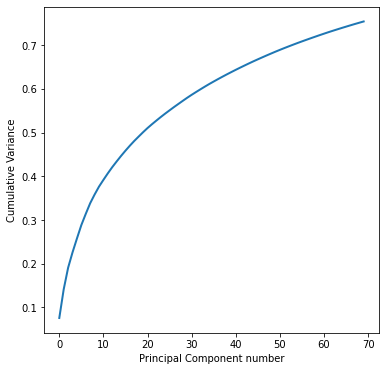

In [ ]:
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(6, 6))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

Από το γράφημα παρατηρούμε πως με 70 συνιστώσες περιγράφουμε το μεγαλύτερο κομμάτι της διακύμανσης του dataset.Παρακάτω θα πειραμαιστούμε στο GridSearchCV αναζητώντας μία καλή τιμή κύριων συνιστωσών.

### Hyperparameter tuning

Για το κούρδισμα υπερπαραμέτρων θα εφαρμόσουμε 5-fold cross validation με τη μέθοδο gridsearchCV που κάνει μαζί και gridsearch μαζί.Στη συνέχεια πειραματιζόμαστε με την αρχιτεκτονική του pipeline και τέλος αξιολογούμε τα καλύτερα αποτελέσματα συγκριτικά με αυτά που είχαμε πριν τη βελτιστοποίηση.

In [ ]:
# Συνάρτηση όπου εφαρμόζει GridSearchCV.
def grid_search(train, test, train_labels, test_labels, steps, grid_params, score):
  pipe = Pipeline(steps , memory = 'tmp')
  estimator = GridSearchCV(pipe, grid_params, cv=5,scoring=score ,n_jobs=-1,verbose=1)
  start_time = time.time()
  estimator.fit(X_train, y_train)
  preds = estimator.predict(X_test)
  ttime =  time.time() - start_time
  return preds, ttime, estimator.best_estimator_

#### kNN Tuning

In [ ]:
# Aρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector =VarianceThreshold()
#pca = PCA()

vthreshold = [0, 0.001, 0.002, 0.005, 0.01]
#n_components = [10, 20, 25, 30]
k = [1, 3, 5, 7, 11, 15, 19]
## 'uniform': Ομοιόμορφη ζύγιση γειτονων
## 'distance': Κοντινότεροι γείτονες επηρεάζουν περισσότερο
weights_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming'] #default minkowski


In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('kNN', clf)], memory = 'tmp')

Eπιλέγουμε n_jobs=-1 για να χρησιοποιήσουμε ολους τους πυρήνες και verbose=1, για έλεγχο της προόδου μας

In [ ]:
# 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k, kNN__weights=weights_options, kNN__metric=metric_options), cv=5, scoring='f1_micro', n_jobs=-1, verbose=1)

Το GridSearchCV είναι επίσης ένας estimator με fit και predict. 

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  2.8min finished


Συνολικός χρόνος fit και predict: 168.03073811531067 seconds
              precision    recall  f1-score   support

           1       0.78      1.00      0.87        38
           2       0.92      0.94      0.93        36
           3       0.96      0.79      0.87        34
           4       0.96      0.62      0.75        39
           5       0.97      0.97      0.97        31
           6       0.79      0.91      0.85        34
           7       0.89      0.89      0.89        35
           8       0.95      0.97      0.96        40
           9       0.77      0.81      0.79        37

    accuracy                           0.88       324
   macro avg       0.89      0.88      0.88       324
weighted avg       0.89      0.88      0.87       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('kNN',
                 KNeighborsClassifier(metric='manhattan', n_jobs=-1,
                                      n_neighbors=15, weights='distance'))])
{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 15, 'kNN__weights': 'distance', 'selector__threshold': 0}


Bλέπουμε πως το Variance Threshold δεν βοηθά τον kNN.Θα προχωρήσουμε σε 2η αναζήτηση μήπως βελτιώσουμε το accuracy μέσω της PCA τεχνικής

##### 2nd search for kNN

In [ ]:
selector =VarianceThreshold()
pca = PCA()

vthreshold = [0]
n_components = [50,100,120,140,160,180,200,220,240,260,279]
k = [ 7,9, 10,11,12,13, 14,15,16, 20]

weights_options = ['distance']
metric_options = ['euclidean','manhattan'] 
pipe = Pipeline(steps=[('selector', selector),('pca',pca),('kNN', clf)], memory = 'tmp')

In [ ]:
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k,kNN__weights=weights_options, kNN__metric=metric_options, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)

In [ ]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)

print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

print (classification_report(test_labels, preds))

Συνολικός χρόνος fit και predict: 80.41015100479126 seconds
              precision    recall  f1-score   support

           1       0.78      1.00      0.87        38
           2       0.92      0.94      0.93        36
           3       0.96      0.79      0.87        34
           4       0.96      0.62      0.75        39
           5       0.97      0.97      0.97        31
           6       0.79      0.91      0.85        34
           7       0.89      0.89      0.89        35
           8       0.95      0.97      0.96        40
           9       0.77      0.81      0.79        37

    accuracy                           0.88       324
   macro avg       0.89      0.88      0.88       324
weighted avg       0.89      0.88      0.87       324



In [ ]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('pca', PCA(n_components=220)),
                ('kNN',
                 KNeighborsClassifier(metric='manhattan', n_jobs=-1,
                                      n_neighbors=13, weights='distance'))])
{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 13, 'kNN__weights': 'distance', 'pca__n_components': 220, 'selector__threshold': 0}


Παρά το progressive search δεν καταφέραμε να βελτιώσουμε την απόδοση.Καταλήξαμε σε άλλο τοπικό μέγιστο με το ίδιο accuracy.Όμως δεν εκτιμουμε πως υπάρχουν πολλά περιθώρια βελτίωσης,συνεπώς δεν έχει νόημα περαιτέρω αναζητήση

#### MLP Tuning

Aρχικά ορίζουμε το μοντέλο και μερικές τιμές παραμέτρων για να χρησιμοποιηθούν στο GridSearchCV.Για περισσότερες πληροφορίες πάνω σε αυτές τις παραμέτρους παραμπέπουμε στο [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
hidden_layer_sizes = [4, 8, 12, 16, 20]
activations = ['logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
max_iters = [50, 100, 200, 300]
learning_rates = ['constant', 'invscaling', 'adaptive']
alphas = [0.01, 0.001, 0.0001]

##### Xωρίς προεργασία δεδομένων

Aρχικά δοκιμάζουμε να κάνουμε βελτιστοποίηση υπερπαραμέτρων χωρίς προεργασία των δεδομένων,προκειμένου να δούμε στην πράξη τα οφέλη της προεργασίας δεδομένων

In [ ]:
model=[('mlp', MLPClassifier())]
grid_params = {}
grid_params['mlp__hidden_layer_sizes'] = hidden_layer_sizes
grid_params['mlp__activation'] = activations
grid_params['mlp__solver'] = solvers
grid_params['mlp__max_iter'] = max_iters
grid_params['mlp__learning_rate'] = learning_rates
grid_params['mlp__alpha'] = alphas

preds_micro, ttime_micro, best_micro = grid_search(train, test, train_labels, test_labels, model, grid_params, 'f1_micro')

preds_macro, ttime_macro, best_macro = grid_search(train, test, train_labels, test_labels, model, grid_params, 'f1_macro')

In [ ]:
mlp_f1_micro_opt = f1_score(test_labels, preds_micro, average="micro")
mlp_f1_macro_opt = f1_score(test_labels, preds_macro, average="macro")

In [ ]:
print('\033[1m'+"MLP πριν την προεργασία δεδομένων"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')


print('F1 micro: %f' %mlp_f1_micro_opt)
print('Χρόνος για fit και predict: %f' %ttime_micro)
print('Καλύτερο μοντέλο στο σκορ f1-micro:')
print(best_micro)


print('F1 macro: %f' %mlp_f1_macro_opt)
print('Χρόνος για fit και predict: %f' %ttime_macro)
print('Καλύτερο μοντέλο στο σκορ f1-macro:')
print(best_macro)
print('---------------------------------------------------------------------------------------')

MLP πριν την προεργασία δεδομένων

---------------------------------------------------------------------------------------
F1 micro: 0.950617
Χρόνος για fit και predict: 4531.720156
Καλύτερο μοντέλο στο σκορ f1-micro:
Pipeline(memory='tmp',
         steps=[('mlp',
                 MLPClassifier(alpha=0.001, hidden_layer_sizes=20,
                               learning_rate='adaptive', max_iter=300))])
F1 macro: 0.955964
Χρόνος για fit και predict: 4533.838627
Καλύτερο μοντέλο στο σκορ f1-macro:
Pipeline(memory='tmp',
         steps=[('mlp',
                 MLPClassifier(alpha=0.001, hidden_layer_sizes=20,
                               learning_rate='adaptive'))])
---------------------------------------------------------------------------------------


##### Με επιλογή χαρακτηριστικών

Καθώς απο την προηγούμενη αναζήτηση βρήκαμε κάποιες καλές τιμές/παραμέτρους μπορούμε να προσπαθήσουμε να τις βελτιστοποιήσουμε (progressive search). Έτσι επιλέγουμε 'learning rate = adaptive' και 'alpha = 0.001'.

In [ ]:
#-----------------------------------------------------------------------#
#   Pipeline:  Feature selection -> MLP                                 #
#-----------------------------------------------------------------------#

hidden_layer_sizes = [ 20, 30 ]
activations = ['logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
max_iters = [20,30]
learning_rates = [ 'adaptive']
alphas = [0.001]
vthreshold = [0.0, 0.01, 0.1] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε


pipe = [('selector', selector), ('mlp', MLPClassifier())]
grid_params = {'mlp__hidden_layer_sizes':hidden_layer_sizes,
               'mlp__activation':activations,
               'mlp__solver':solvers,
               'mlp__max_iter':max_iters,
               'mlp__learning_rate':learning_rates,
               'mlp__alpha':alphas,
               'selector__threshold':vthreshold
               }

preds_micro, ttime_micro, best_micro = grid_search(train, test, train_labels, test_labels, pipe, grid_params, 'f1_micro')
preds_macro, ttime_macro, best_macro = grid_search(train, test, train_labels, test_labels, pipe, grid_params, 'f1_macro')

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 374 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 537 out of 540 | elapsed:   51.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   51.3s finished


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 374 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 537 out of 540 | elapsed:   51.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   51.4s finished


In [ ]:
mlp_f1_micro_opt_sel = f1_score(test_labels, preds_micro, average="micro")
mlp_f1_macro_opt_sel = f1_score(test_labels, preds_macro, average="macro")

print('\033[1m'+"MLP με επιλογή χαρακτηριστικών μέσω κατωφλίου"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')


print('F1 micro: %f' %mlp_f1_micro_opt)
print('Χρόνος για fit και predict: %f' %ttime_micro)
print('Καλύτερο μοντέλο στο σκορ f1-micro:')
print(best_micro)


print('F1 macro: %f' %mlp_f1_macro_opt)
print('Χρόνος για fit και predict: %f' %ttime_macro)
print('Καλύτερο μοντέλο στο σκορ f1-macro:')
print(best_macro)
print('---------------------------------------------------------------------------------------')

MLP με επιλογή χαρακτηριστικών μέσω κατωφλίου

---------------------------------------------------------------------------------------
F1 micro: 0.950617
Χρόνος για fit και predict: 53.323138
Καλύτερο μοντέλο στο σκορ f1-micro:
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=0.001,
                               hidden_layer_sizes=20, learning_rate='adaptive',
                               max_iter=30, solver='lbfgs'))])
F1 macro: 0.955964
Χρόνος για fit και predict: 52.624823
Καλύτερο μοντέλο στο σκορ f1-macro:
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=0.001,
                               hidden_layer_sizes=30, learning_rate='adaptive',
                               max_iter=20, solver='lbfgs'))])
-----------------------------------------------------------------------

Παρατηρούμε πως δεν βελτιώθηκαν τα αποτελέσματά μας,συνεπώς δεν υπάρχει λόγος να χρησιμοποιήσουμε κατώφλι στην επιλογή χαρακτηριστικών

##### Κανονικοποίηση

In [ ]:
#-----------------------------------------------------------------------#
#   Pipeline:  normalization -> MLP                                 #
#-----------------------------------------------------------------------#

hidden_layer_sizes = [ 20, 30 ]
activations = ['logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
max_iters = [20,30]
learning_rates = [ 'adaptive']
alphas = [0.001]


pipe = [('scaler', MinMaxScaler()), ('mlp', MLPClassifier())]

grid_params = {'mlp__hidden_layer_sizes':hidden_layer_sizes,
               'mlp__activation':activations,
               'mlp__solver':solvers,
               'mlp__max_iter':max_iters,
               'mlp__learning_rate':learning_rates,
               'mlp__alpha':alphas}


preds_micro, ttime_micro, best_micro = grid_search(train, test, train_labels, test_labels, pipe, grid_params, 'f1_micro')
preds_macro, ttime_macro, best_macro = grid_search(train, test, train_labels, test_labels, pipe, grid_params, 'f1_macro')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   28.4s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   26.9s finished


In [ ]:
mlp_f1_micro_opt_sel = f1_score(test_labels, preds_micro, average="micro")
mlp_f1_macro_opt_sel = f1_score(test_labels, preds_macro, average="macro")

print('\033[1m'+"MLP με Μin-Max scaler"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')


print('F1 micro: %f' %mlp_f1_micro_opt)
print('Χρόνος για fit και predict: %f' %ttime_micro)
print('Καλύτερο μοντέλο στο σκορ f1-micro:')
print(best_micro)


print('F1 macro: %f' %mlp_f1_macro_opt)
print('Χρόνος για fit και predict: %f' %ttime_macro)
print('Καλύτερο μοντέλο στο σκορ f1-macro:')
print(best_macro)
print('---------------------------------------------------------------------------------------')

MLP με Μin-Max scaler

---------------------------------------------------------------------------------------
F1 micro: 0.950617
Χρόνος για fit και predict: 28.759223
Καλύτερο μοντέλο στο σκορ f1-micro:
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=0.001,
                               hidden_layer_sizes=30, learning_rate='adaptive',
                               max_iter=20, solver='lbfgs'))])
F1 macro: 0.955964
Χρόνος για fit και predict: 27.598255
Καλύτερο μοντέλο στο σκορ f1-macro:
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=0.001,
                               hidden_layer_sizes=20, learning_rate='adaptive',
                               max_iter=20, solver='lbfgs'))])
---------------------------------------------------------------------------------------


Και πάλι παρατηρούμε ακριβώς τα ίδια αποτελέσματα.Φαίνεται πως βρισκόμαστε σε τοπικό (ή ολικό) μέγιστο.Εφαρμόζουμε και την τεχνική ανάλυσης σε κύριες συνιστώσες σε συνδυασμό με την κανονικοποίηση.

##### Κανονικοποίηση + PCA

In [ ]:
#-----------------------------------------------------------------------#
#   Pipeline:  Normalization-> PCA -> MLP                                 #
#-----------------------------------------------------------------------#
n_components = [40, 50, 60, 70, 80]
pipe = [('scaler', MinMaxScaler()),('pca', PCA()), ('mlp', MLPClassifier())]

grid_params['pca__n_components'] = n_components

preds_micro, ttime_micro, best_micro = grid_search(train, test, train_labels, test_labels, pipe, grid_params, 'f1_micro')
preds_macro, ttime_macro, best_macro = grid_search(train, test, train_labels, test_labels, pipe, grid_params, 'f1_macro')

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.1min finished


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   59.4s finished


In [ ]:
mlp_f1_micro_opt_sel = f1_score(test_labels, preds_micro, average="micro")
mlp_f1_macro_opt_sel = f1_score(test_labels, preds_macro, average="macro")

print('\033[1m'+"MLP με Μin-Max scaler και PCA"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')


print('F1 micro: %f' %mlp_f1_micro_opt)
print('Χρόνος για fit και predict: %f' %ttime_micro)
print('Καλύτερο μοντέλο στο σκορ f1-micro:')
print(best_micro)


print('F1 macro: %f' %mlp_f1_macro_opt)
print('Χρόνος για fit και predict: %f' %ttime_macro)
print('Καλύτερο μοντέλο στο σκορ f1-macro:')
print(best_macro)
print('---------------------------------------------------------------------------------------')

MLP με Μin-Max scaler και PCA

---------------------------------------------------------------------------------------
F1 micro: 0.950617
Χρόνος για fit και predict: 63.527445
Καλύτερο μοντέλο στο σκορ f1-micro:
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=70)),
                ('mlp',
                 MLPClassifier(alpha=0.001, hidden_layer_sizes=30,
                               learning_rate='adaptive', max_iter=20,
                               solver='lbfgs'))])
F1 macro: 0.955964
Χρόνος για fit και predict: 59.785499
Καλύτερο μοντέλο στο σκορ f1-macro:
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=80)),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=0.001,
                               hidden_layer_sizes=20, learning_rate='adaptive',
                               max_iter=20, solver='lbfgs'))])
----------------------------------------------------------

##### Aποτελέσματα στο MLP

Παρά τις προσπάθειές μας για βελτιστοποίηση της αρχιτεκτονικής,δεν καταφέραμε καλύτερα αποτελέσματα από αυτά που πετύχαμε μετά την αρχική βελτιστοποίηση υπερ-παραμέτρων πριν την προεργασία δεδομένων.Αυτή η παραδοχή μας αποδεικνύει την αρχική μας υπόθεση,πως δηλαδή έχουμε πέσει σε ένα τοπικό (ή ολικό) μέγιστο της συνάρτησης και πως παρά τις προσπάθειές μας για βελτιστοποίηση είναι αδύνατο για κοντινές τιμές των παραμέτρων από αυτές που έχουμε επιλέξει να επιφέρουμε καλύτερα αποτελέσματα.

Καναμε μερικές δοκιμές χωρίς τη χρήση των διάφορων μέσων προεπεξεργασίας δεδομένων χρησιμοποιώντας στα αντίστοιχα πεδία τις βέλτιστες τιμές που προέκυψαν από το cross validation. Από τις τιμές των f1 όπου προέκυψαν καταλήγουμε στα εξής συμπεράσματα: Η χρήση selector βελτιώνει τα αποτελέματα όπως αναφέρθηκε και νωρίτερα, όμοια και η χρήση PCA, μιας και με 70 συνιστώσες κρατάμε πιθανότατα όλο το ποσοστό πληροφορίας που απαιτείται για να έχουμε βέλτιστα αποτελέσματα. Σημαντική διαφορά παρατηρείται με τη χρήση και με scaler, ενώ και η χρήση του oversampling δίνει καλύτερο αποτέλεσμα της μετρικής f1 macro και ίδιο αποτέλεσμα στη μετρική f1 micro. 

#### SVM Tuning

##### Linear Kernel 

<h5>1st Search</h5>

In [ ]:
#---------------------------------------------------------------------#
# Yπερπαραμέτρoι του SVC για βελτιστοποίηση: loss, tol, C             #
#---------------------------------------------------------------------#
svc = LinearSVC()
scaler = MinMaxScaler()
selector = VarianceThreshold()
pca = PCA()

LinearSVC_param = {
              'linearsvc__C': [1, 5, 10],
              'linearsvc__tol': [0.0001, 0.0005, 0.001, 0.005],
              'linearsvc__loss':['hinge', 'squared_hinge'],
              'pca__n_components': [60, 70, 80],
              'linearsvc__multi_class':['ovr', 'crammer_singer']
              }

pipe = make_pipeline(scaler,pca,svc)

linearsvc_macro = GridSearchCV(pipe, LinearSVC_param, cv=5, scoring='f1_macro',n_jobs=-1, verbose=1)
linearsvc_micro = GridSearchCV(pipe, LinearSVC_param, cv=5, scoring='f1_micro', n_jobs=-1, verbose=1)
%time linearsvc_macro.fit(train, train_labels)
%time linearsvc_micro.fit(train, train_labels)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.8min finished


CPU times: user 3.36 s, sys: 461 ms, total: 3.82 s
Wall time: 1min 50s
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.8min finished


CPU times: user 3.27 s, sys: 276 ms, total: 3.55 s
Wall time: 1min 48s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('pca', PCA()),
                                       ('linearsvc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'linearsvc__C': [1, 5, 10],
                         'linearsvc__loss': ['hinge', 'squared_hinge'],
                         'linearsvc__multi_class': ['ovr', 'crammer_singer'],
                         'linearsvc__tol': [0.0001, 0.0005, 0.001, 0.005],
                         'pca__n_components': [60, 70, 80]},
             scoring='f1_micro', verbose=1)

In [ ]:
preds_micro = linearsvc_micro.predict(test) 
preds_macro = linearsvc_macro.predict(test)
LinearSVC_f1_micro_opt = f1_score(test_labels, preds_micro, average="micro")
LinearSVC_f1_macro_opt = f1_score(test_labels, preds_macro, average="macro")

print('\033[1m'+"F1-micro:"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')
print('F1 micro: %f' %LinearSVC_f1_micro_opt)
print('Καλύτερο μοντέλο στο σκορ f1-micro:')
print(linearsvc_micro.best_estimator_)
print("Best parameters = ",linearsvc_micro.best_params_)
print('---------------------------------------------------------------------------------------')
print('\033[1m'+"\n\nF1-macro:"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')
print('F1 macro: %f' %LinearSVC_f1_macro_opt)
print('Καλύτερο μοντέλο στο σκορ f1-macro:')
print(linearsvc_macro.best_estimator_)
print("Best parameters = ",linearsvc_macro.best_params_)
print('---------------------------------------------------------------------------------------')

F1-micro:

---------------------------------------------------------------------------------------
F1 micro: 0.938272
Καλύτερο μοντέλο στο σκορ f1-micro:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=80)),
                ('linearsvc', LinearSVC(C=1, tol=0.005))])
Best parameters =  {'linearsvc__C': 1, 'linearsvc__loss': 'squared_hinge', 'linearsvc__multi_class': 'ovr', 'linearsvc__tol': 0.005, 'pca__n_components': 80}
---------------------------------------------------------------------------------------


F1-macro:

---------------------------------------------------------------------------------------
F1 macro: 0.934861
Καλύτερο μοντέλο στο σκορ f1-macro:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=80)),
                ('linearsvc', LinearSVC(C=1))])
Best parameters =  {'linearsvc__C': 1, 'linearsvc__loss': 'squared_hinge', 'linearsvc__multi_class': 'ovr', 'linearsvc__tol': 0.0001, 'pca__n_components': 80}
----------------

<h5>Progressive Search (2nd)</h5>

In [ ]:
LinearSVC_param = {
              'linearsvc__C': [1, 2, 3],
              'linearsvc__tol': [ 0.0005, 0.00075, 0.001, 0.0015],
              'linearsvc__loss':['hinge', 'squared_hinge'],
              'pca__n_components': [80,85,90,95],
              'linearsvc__multi_class':['ovr', 'crammer_singer']
              }

pipe = make_pipeline(scaler,pca,svc)

linearsvc_macro = GridSearchCV(pipe, LinearSVC_param, cv=5, scoring='f1_macro',n_jobs=-1, verbose=1)
linearsvc_micro = GridSearchCV(pipe, LinearSVC_param, cv=5, scoring='f1_micro', n_jobs=-1, verbose=1)
%time linearsvc_macro.fit(train, train_labels)
%time linearsvc_micro.fit(train, train_labels)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.1min finished


CPU times: user 4.45 s, sys: 490 ms, total: 4.94 s
Wall time: 2min 3s
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.0min finished


CPU times: user 3.18 s, sys: 287 ms, total: 3.47 s
Wall time: 2min 1s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('pca', PCA()),
                                       ('linearsvc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'linearsvc__C': [1, 2, 3],
                         'linearsvc__loss': ['hinge', 'squared_hinge'],
                         'linearsvc__multi_class': ['ovr', 'crammer_singer'],
                         'linearsvc__tol': [0.0005, 0.00075, 0.001, 0.0015],
                         'pca__n_components': [80, 85, 90, 95]},
             scoring='f1_micro', verbose=1)

F1-micro:

---------------------------------------------------------------------------------------
F1 micro: 0.947531
Καλύτερο μοντέλο στο σκορ f1-micro:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=95)),
                ('linearsvc', LinearSVC(C=1, tol=0.0015))])
Best parameters =  {'linearsvc__C': 1, 'linearsvc__loss': 'squared_hinge', 'linearsvc__multi_class': 'ovr', 'linearsvc__tol': 0.0015, 'pca__n_components': 95}


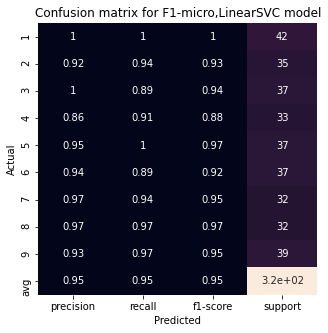

---------------------------------------------------------------------------------------


In [ ]:
preds_micro = linearsvc_micro.predict(test) 
preds_macro = linearsvc_macro.predict(test)
LinearSVC_f1_micro_opt = f1_score(test_labels, preds_micro, average="micro")
LinearSVC_f1_macro_opt = f1_score(test_labels, preds_macro, average="macro")

print('\033[1m'+"F1-micro:"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')
print('F1 micro: %f' %LinearSVC_f1_micro_opt)
print('Καλύτερο μοντέλο στο σκορ f1-micro:')
print(linearsvc_micro.best_estimator_)
print("Best parameters = ",linearsvc_micro.best_params_)
plot_classification_report(test_labels,preds_micro)
 
print('---------------------------------------------------------------------------------------')



F1-macro:

---------------------------------------------------------------------------------------
F1 macro: 0.943645
Καλύτερο μοντέλο στο σκορ f1-macro:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=85)),
                ('linearsvc', LinearSVC(C=1, tol=0.001))])
Best parameters =  {'linearsvc__C': 1, 'linearsvc__loss': 'squared_hinge', 'linearsvc__multi_class': 'ovr', 'linearsvc__tol': 0.001, 'pca__n_components': 85}


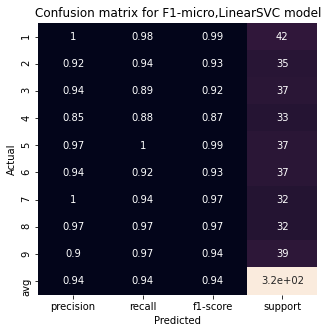

---------------------------------------------------------------------------------------


In [ ]:
print('\033[1m'+"\n\nF1-macro:"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')
print('F1 macro: %f' %LinearSVC_f1_macro_opt)
print('Καλύτερο μοντέλο στο σκορ f1-macro:')
print(linearsvc_macro.best_estimator_)
print("Best parameters = ",linearsvc_macro.best_params_)
plot_classification_report(test_labels,preds_macro)

print('---------------------------------------------------------------------------------------')

##### Other Kernels

<h5>1st Search</h5>

In [ ]:
svc = SVC(class_weight=None)

param_grid = {'pca__n_components': [65, 70, 75],
              'svc__kernel': ['poly', 'rbf', 'sigmoid', 'precomputed'],
              'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005],
              'svc__degree':[1,3,5,7],              
              }


pipe = Pipeline(steps=[('selector', selector),('scaler',scaler),('pca',pca),('SVC', svc)], memory = 'tmp')
pipe = make_pipeline(scaler,pca,svc)

linearsvc_macro = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro',n_jobs=-1, verbose=1)
linearsvc_micro = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=1)
%time linearsvc_macro.fit(train, train_labels)
%time linearsvc_micro.fit(train, train_labels)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  6.5min finished


CPU times: user 17.6 s, sys: 1.12 s, total: 18.7 s
Wall time: 6min 32s
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  6.6min finished


CPU times: user 17.4 s, sys: 1.11 s, total: 18.5 s
Wall time: 6min 34s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [65, 70, 75],
                         'svc__C': [1, 5, 10, 50], 'svc__degree': [1, 3, 5, 7],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005],
                         'svc__kernel': ['poly', 'rbf', 'sigmoid',
                                         'precomputed']},
             scoring='f1_micro', verbose=1)

In [ ]:
preds_micro = linearsvc_micro.predict(test) 
preds_macro = linearsvc_macro.predict(test)
LinearSVC_f1_micro_opt = f1_score(test_labels, preds_micro, average="micro")
LinearSVC_f1_macro_opt = f1_score(test_labels, preds_macro, average="macro")

print('\033[1m'+"F1-micro"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')
print('\nF1 micro: %f' %LinearSVC_f1_micro_opt)
print('\nΚαλύτερο μοντέλο στο σκορ f1-micro:')
print(linearsvc_micro.best_estimator_)
print("\nBest parameters = ",linearsvc_micro.best_params_)
print(classification_report(test_labels,preds_micro),"\n\n")

print('---------------------------------------------------------------------------------------')

print('\033[1m'+"\n\nF1-macro:"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')
print('\n\nF1 macro %f' %LinearSVC_f1_macro_opt)
print('\nΚαλύτερο μοντέλο στο σκορ f1-macro:')
print(linearsvc_macro.best_estimator_)
print("\nBest parameters = ",linearsvc_macro.best_params_)
print(classification_report(test_labels,preds_macro),"\n\n")

print('---------------------------------------------------------------------------------------')

F1-micro

---------------------------------------------------------------------------------------

F1 micro: 0.904321

Καλύτερο μοντέλο στο σκορ f1-micro:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=70)),
                ('svc', SVC(C=50, degree=1, gamma=0.005))])

Best parameters =  {'pca__n_components': 70, 'svc__C': 50, 'svc__degree': 1, 'svc__gamma': 0.005, 'svc__kernel': 'rbf'}
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        42
           2       0.81      0.97      0.88        35
           3       0.94      0.92      0.93        37
           4       0.78      0.94      0.85        33
           5       1.00      1.00      1.00        37
           6       0.96      0.73      0.83        37
           7       0.96      0.81      0.88        32
           8       1.00      0.91      0.95        32
           9       0.78      0.92      0.85        39

    accuracy                           0.

<h5>2nd Search (Progressive)</h5>

In [ ]:
svc = SVC(class_weight=None)

param_grid = {'pca__n_components': [65, 70, 75],
              'svc__kernel': ['poly', 'rbf', 'sigmoid', 'precomputed'],
              'svc__C': [ 50,55,60,70],
              'svc__gamma': [ 0.005, 0.01, 0.015],
              'svc__degree':[1,2,7,9,11],              
              }


pipe = Pipeline(steps=[('selector', selector),('scaler',scaler),('pca',pca),('SVC', svc)], memory = 'tmp')
pipe = make_pipeline(scaler,pca,svc)

linearsvc_macro = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro',n_jobs=-1, verbose=1)
linearsvc_micro = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=1)
%time linearsvc_macro.fit(train, train_labels)
%time linearsvc_micro.fit(train, train_labels)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  5.1min finished


CPU times: user 16 s, sys: 1.03 s, total: 17 s
Wall time: 5min 6s
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  5.0min finished


CPU times: user 11.4 s, sys: 755 ms, total: 12.1 s
Wall time: 5min


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [65, 70, 75],
                         'svc__C': [50, 55, 60, 70],
                         'svc__degree': [1, 2, 7, 9, 11],
                         'svc__gamma': [0.005, 0.01, 0.015],
                         'svc__kernel': ['poly', 'rbf', 'sigmoid',
                                         'precomputed']},
             scoring='f1_micro', verbose=1)

In [ ]:
preds_micro = linearsvc_micro.predict(test) 
preds_macro = linearsvc_macro.predict(test)
LinearSVC_f1_micro_opt = f1_score(test_labels, preds_micro, average="micro")
LinearSVC_f1_macro_opt = f1_score(test_labels, preds_macro, average="macro")

print('\033[1m'+"F1-micro"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')
print('\nF1 micro: %f' %LinearSVC_f1_micro_opt)
print('\nΚαλύτερο μοντέλο στο σκορ f1-micro:')
print(linearsvc_micro.best_estimator_)
print("\nBest parameters = ",linearsvc_micro.best_params_)
print(classification_report(test_labels,preds_micro),"\n\n")

print('---------------------------------------------------------------------------------------')

print('\033[1m'+"\n\nF1-macro:"+'\033[0m'+'\n')
print('---------------------------------------------------------------------------------------')
print('\n\nF1 macro %f' %LinearSVC_f1_macro_opt)
print('\nΚαλύτερο μοντέλο στο σκορ f1-macro:')
print(linearsvc_macro.best_estimator_)
print("\nBest parameters = ",linearsvc_macro.best_params_)
print(classification_report(test_labels,preds_macro),"\n\n")

print('---------------------------------------------------------------------------------------')

F1-micro

---------------------------------------------------------------------------------------

F1 micro: 0.904321

Καλύτερο μοντέλο στο σκορ f1-micro:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=75)),
                ('svc', SVC(C=70, degree=9, gamma=0.015))])

Best parameters =  {'pca__n_components': 75, 'svc__C': 70, 'svc__degree': 9, 'svc__gamma': 0.015, 'svc__kernel': 'rbf'}
              precision    recall  f1-score   support

           1       0.98      0.98      0.98        42
           2       0.97      0.94      0.96        35
           3       0.87      0.89      0.88        37
           4       0.78      0.88      0.83        33
           5       1.00      1.00      1.00        37
           6       0.90      0.76      0.82        37
           7       1.00      0.91      0.95        32
           8       0.94      0.91      0.92        32
           9       0.76      0.87      0.81        39

    accuracy                           0.

#### Σχολιασμός

Βλέπουμε πως τα αποτελέσματά μας βελτιώθηκαν σημαντικά σε όλα τα μοντέλα χρησιμοποιώντας την μέθοδο GridSearchCV. Το γεγονός αυτό μας δείχνει τη σημαντικότητα βελτιστοποίησης των υπερπαραμέτρων των μοντέλων μας καθώς και την ανάγκη εύρεσης της βέλτιστης αρχιτεκτονικής στο pipeline της εκτέλεσης μιας διεργασίας machine learning.

